**Download libaries**

In [12]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
from functools import partial
import seaborn as sns
from google.colab import drive
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from math import sqrt
from scipy import stats
from sklearn.svm import SVR
import matplotlib


**Functions for testing and evaluating regression models, as well as for plotting the performance metrics such as R-squared, MAE, and RMSE, using Matplotlib** 

In [13]:
def test_model_reg(model, model_name, x_train, y_train, x_test, y_test):
  # Train the model using the training data
  model.fit(x_train,y_train)

  # Use the trained model to make predictions on the testing and training data
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  # Compute R^2 scores for both training and testing data
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  # Compute mean absolute error (MAE) scores for both training and testing data
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)

  # Compute root mean squared error (RMSE) scores for both training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

  # Store the scores in a dictionary
  scores = {
      'r2': {'train':r2_train, 'val': r2_test},
      'rmse': {'train':rmse_train, 'val': rmse_test},
      'mae': {'train':mae_train, 'val': mae_test}
  }

  # Plot the predicted vs. ground truth values for the testing data
  plt.scatter(y_test,y_test_pred, s=5)
  plt.xlabel('GT')
  plt.ylabel('Predicted')
  plt.gca().set_aspect('equal')
  plt.title(model_name)
  plt.show()
  plt.close()
  
  # Return the scores dictionary
  return scores

def plot_r2(model_names, model_scores_t, model_scores_v):
  # Plot the R^2 scores for the training and validation data for each model
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel(r'$R^2$')
  plt.xticks(rotation=45, ha='right')
  plt.ylim(-0.1, 1)
  plt.legend()
  plt.show()
  plt.close()

def plot_score_reg(model_names, model_scores_t, model_scores_v):
  # Plot a generic score (e.g. R^2, accuracy) for the training and validation data for each model
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('score')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

def plot_mae(model_names, model_scores_t, model_scores_v):
  # Plot the mean absolute error (MAE) scores for the training and validation data for each model
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('MAE')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

def plot_rmse(model_names, model_scores_t, model_scores_v):
  # Plot the root mean squared error (RMSE) scores for the training and validation data for each model
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('RMSE')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()  

**Functions to test and plot various evaluation metrics for machine learning models, including score, F1 score, precision, recall, average precision, and precision-recall curve**

In [14]:
def test_model_class(model, model_name, x_train, y_train, x_test, y_test):
  # Fit the model on the training data
  model.fit(x_train,y_train)

  # Use the trained model to make predictions on the training and validation data
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  # Calculate the score of the model on the training and validation data
  score_train = model.score(x_train,y_train)
  score_test = model.score(x_test,y_test)

  # Calculate the F1 score of the model on the training and validation data
  f1_test = f1_score(y_test, y_test_pred) #, average='micro')
  f1_train = f1_score(y_train, y_train_pred) #, average='micro')

  # Calculate the precision of the model on the training and validation data
  precision_test = precision_score (y_test, y_test_pred,zero_division=0) #, average='micro')
  precision_train= precision_score (y_train, y_train_pred,zero_division=0) #, average='micro')

  # Calculate the recall of the model on the training and validation data
  recall_test = recall_score(y_test, y_test_pred )#, average='micro')
  recall_train = recall_score(y_train, y_train_pred )#,  average='micro')

  # Create a dictionary to store the scores of the model
  scores = {
      'Score': {'train':score_train, 'val': score_test},
      'F1': {'train':f1_train, 'val': f1_test},
      'Precision': {'train':precision_train, 'val': precision_test},
      'Recall': {'train':recall_train, 'val': recall_test},
      'AP': None,
      'PR_curve': None,
  }

  try:

    # If the model has a predict_proba method, use it to make predictions and calculate the average precision score
    y_test_pred_proba = model.predict_proba(x_test)
    y_train_pred_proba = model.predict_proba(x_train)

    # Convert the target values to one-hot encoding format
    ohe = OneHotEncoder(sparse_output=False)
    y_train_oh = ohe.fit_transform(y_train.reshape((-1, 1))) 
    y_test_oh = ohe.fit_transform(y_test.reshape((-1, 1)))

    # Calculate the average precision score of the model on the training and validation data
    ap_test = average_precision_score(y_test_oh, y_test_pred_proba)
    ap_train = average_precision_score(y_train_oh, y_train_pred_proba)
    
    # Calculate the precision-recall curve of the model on the training and validation data
    pr_curve_test = precision_recall_curve(y_test, y_test_pred_proba[:, -1])
    pr_curve_train = precision_recall_curve(y_train, y_train_pred_proba[:, -1])

    # Add the average precision score and the precision-recall curve to the scores dictionary
    scores['AP'] = {'train':ap_train, 'val': ap_test}
    scores['PR_curve'] = {'train':pr_curve_train, 'val': pr_curve_test}
  except AttributeError as e:
    # If the model does not have a predict_proba method, print an error message
    print(e)
  
  # Display a confusion matrix for the model's predictions on the validation data
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize = 'true')
  plt.title(model_name)
  plt.show()
  plt.close()

  # Return the scores dictionary
  return scores

def plot_score_generic(model_names, model_scores_t, model_scores_v, score_name):
  # Plot the training scores
  plt.plot(model_names, model_scores_t, '*', label = 'training')

  # Plot the validation scores
  plt.plot(model_names, model_scores_v, '*', label = 'validation')

  plt.ylabel(score_name)
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

# A convenience function to plot scores with the default name "score"
def plot_score(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='score')

# A convenience function to plot F1 scores
def plot_f1_score(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='f1')

# A convenience function to plot precision scores
def plot_score_precision(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='precision')

# A convenience function to plot recall scores
def plot_score_recall(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='recall')

# A convenience function to plot average precision scores  
def plot_score_ap(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='AP')

# A generic function to plot precision-recall curves for different models
def plot_curve_generic(model_names, model_scores_t, model_scores_v, x_score_name, y_score_name):
  # Plot the precision-recall curve for each model on the training set
  for mn, (precision, recall, thresholds) in zip(model_names, model_scores_t):
    plt.plot(recall, precision, '--', label = f'{mn} training')
    # Plot the precision-recall curve for each model on the validation set
  for mn, (precision, recall, thresholds) in zip(model_names, model_scores_v):
    plt.plot(recall, precision, '-', label = f'{mn} validation')
  
  plt.ylabel(y_score_name)
  plt.xlabel(x_score_name)
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.show()
  plt.close()

**Functions for performing grid search with cross-validation and plotting evaluation metrics for regression models** 

In [15]:
def grid_reg(model, params, features, target):
  # Define scoring metrics
  scoring = {'r2': make_scorer(r2_score),
           'rmse': make_scorer(mean_squared_error),
           'mae': make_scorer(mean_absolute_error)
           }

  # We can perform a  grid search
  model_grid = GridSearchCV(model, params, scoring=scoring, refit='r2')
  model_grid.fit(features, target)
  grid_results = pd.DataFrame(model_grid.cv_results_)

  # Add a column for the root mean squared error  
  grid_results['root_mean_test_mse'] = list(map(lambda n: sqrt(n), grid_results['mean_test_rmse']))

  # Convert the parameter dictionaries to strings and create a list of parameter names
  params_list = grid_results['params']
  our_list = []
  features_list = list(set().union(*(d.keys() for d in params_list)))
  pairs = {}

  # Loop through each parameter dictionary and create a string representation
  for params_dict in params_list:
    our_str = ""
    for i, k in enumerate(features_list):
      if params_dict.get(k) is not None:
        our_str += chr(i + 65) +':'+ str(params_dict[k]) + " "
        pairs[k] = chr(i + 65)
        
    our_list.append(our_str.strip())

  # Replace the parameter dictionaries with their string representation
  grid_results['params'] = our_list
  our_list = grid_results['params']
  
  return model_grid,grid_results,pairs

def plot_cv_r2(model_name, model_params, model_r2,pairs):
  #Plots the cross-validation R2 scores of a model across different hyperparameters
    fig, ax = plt.subplots()
    fig.set_size_inches(30,10)
    plt.plot(model_params, model_r2, label = 'r2', color='blue')
    plt.xticks(rotation=90, ha='right')
    plt.title(model_name)

    # Create list of parameter labels from pairs dictionary
    parameter_labels = []
    for k, v in pairs.items():
      parameter_labels.append(f'{k}={v}')

    # Create text from parameter labels and add it to plot
    text = '\n'.join(parameter_labels)
    plt.legend()
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')
    plt.show()
    plt.close()


def plot_mae_mse(model_name, model_params, model_mse, model_mae, pairs):
    # Create a figure and axis object
    fig, ax = plt.subplots()
    
    # Set the figure size
    fig.set_size_inches(30,10)
    
    # Plot the mean absolute error and root mean squared error
    plt.plot(model_params, model_mae, label='mae')
    plt.plot(model_params, model_mse, label='rmse')
    
    # Rotate the x-axis tick labels by 90 degrees and align them to the right
    plt.xticks(rotation=90, ha='right')
    
    # Set the title of the plot to the model name
    plt.title(model_name)
    
    # Create a list of parameter labels based on the key-value pairs in the 'pairs' dictionary
    parameter_labels = []
    for k, v in pairs.items():
        parameter_labels.append(f'{k}={v}')
    
    # Join the parameter labels with newline characters and assign to the 'text' variable
    text = '\n'.join(parameter_labels)
    
    # Add a legend to the plot
    plt.legend()
    
    # Add the parameter labels to the plot as text in the upper-right corner
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')
    
    plt.show()
    plt.close()


**Defines two functions: "grid_class" performs a grid search for a given model and its hyperparameters, and "plot_cv_metrics" visualizes the cross-validation metrics for the model**

In [16]:
def grid_class(model, params,features, target):
  # Define the scoring metrics for the grid search
  scoring = {'accuracy': make_scorer(accuracy_score),
                    'precision': make_scorer(precision_score, zero_division=0, average='macro'),
                    'recall': make_scorer(recall_score, average='macro'), 
                    'f1': make_scorer(f1_score, average='macro')}

 
    # Perform grid search
  model_grid = GridSearchCV(model, params, scoring=scoring, refit='f1')
  model_grid.fit(features, target)
  df_grid = pd.DataFrame(model_grid.cv_results_)
  
  # Convert the parameter dictionaries to strings and replace them in the dataframe
  params_list = df_grid ['params']
  our_list = []
  features_list = list(set().union(*(d.keys() for d in params_list)))
  pairs = {}
  
  for params_dict in params_list:
    
    our_str = ""
    for i, k in enumerate(features_list):
      if params_dict.get(k) is not None:
        our_str += chr(i + 65) +':'+ str(params_dict[k]) + " "# Convert the parameter dictionaries to strings
        pairs[k] = chr(i + 65) # Store the corresponding character label for each feature
        
    our_list.append(our_str.strip())

  df_grid ['params'] = our_list # Replace the parameter dictionaries with the strings in the dataframe
  our_list = df_grid ['params']
  
  return model_grid, df_grid, pairs

def plot_cv_metrics(model_name, model_params, model_f1, model_recall, model_precision, model_accuracy ,pairs):
    fig, ax = plt.subplots()
    fig.set_size_inches(30,10)
    
    # Plot the F1 score, recall, precision, and accuracy
    plt.plot(model_params, model_f1, label = 'f1')
    plt.plot(model_params, model_recall, label = 'recall')
    plt.plot(model_params, model_precision, label = 'precision' )
    plt.plot(model_params, model_accuracy, label = 'accuracy' )
    
    # Rotate the x-axis tick labels by 90 degrees and align them to the right
    plt.xticks(rotation=90, ha='right')
    
    # Set the title of the plot to the model name
    plt.title(model_name)
    
    # Create a list of parameter labels based on the key-value pairs in the 'pairs' dictionary
    parameter_labels = []
    for k, v in pairs.items():
        parameter_labels.append(f'{k}={v}')
    
    # Join the parameter labels with newline characters and assign to the 'text' variable
    text = '\n'.join(parameter_labels) 
    
    # Add a legend to the plot
    plt.legend()   
    
    # Add the parameter labels to the plot as text in the upper-right corner
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')  
    
    plt.show()
    plt.close()

**Function for visualizing pairwise relationships between variables in a Pandas DataFrame using seaborn's PairGrid, including scatterplots with linear regression lines and annotations of correlation coefficients**

In [37]:
def corr_reg(x, y,**kws):

  # Calculate the Pearson correlation coefficient between x and y  
    r, _ = stats.pearsonr(x, y)

    # Get the current axes instance
    ax = plt.gca()

    # Add an annotation to the plot showing the correlation coefficient
    ax.annotate("r = {:.1f}".format(r),
                xy=(0.2, 0.95),
                xycoords=ax.transAxes, size = 20)
     
def corrfunc(x, y, **kws):
     # Calculate the Pearson correlation coefficient between x and y
    r, _ = stats.pearsonr(x, y)
    # Get the current axes instance
    ax = plt.gca()
    # Determine the number of annotations already on the plot
    n = len([c for c in ax.get_children() if 
                  isinstance(c, matplotlib.text.Annotation)])
    # Determine the position and color of the new annotation based on the hue category
    pos = (.1, .9 - .1*n)
    color = sns.color_palette()[sns.color_palette().index(kws['color'])]

    # Add an annotation to the plot showing the correlation coefficient and hue category
    ax.annotate("{}: r = {:.2f}".format(kws['label'], r), xy=pos, xycoords=ax.transAxes, color=color)

def plot_pair_grid_ref(df, hue):
  # Create a PairGrid with regression plots in the upper triangle
  # and kernel density estimates in the lower triangle
  g = sns.PairGrid(data=df, hue=hue, height=4, aspect=1.5)
  g.map_upper(sns.regplot, scatter_kws={'s':6},line_kws = {'color': 'black'})
  g.map_lower(corr_reg)
  g.map_lower(sns.kdeplot)
  g.map_diag(sns.histplot)
def plot_pair_grid_class(df, hue):
  # Create a PairGrid with regression plots in the upper triangle
  # and annotations of correlation coefficients in the lower triangle
  g = sns.PairGrid(data=df, hue=hue, height=4, aspect=1.5)
  g.map_upper(sns.regplot, scatter_kws={'s':6},line_kws = {'color': 'black'})
  g.map_lower(corrfunc)
  g.map_lower(sns.kdeplot,gridsize=150)
  g.map_diag(sns.histplot) 


**Function that performs a grid search with cross-validation to find the best hyperparameters for a set of regression or classification models, and returns a dictionary containing information on the models including the model object, best hyperparameters, and evaluation metrics**

In [38]:
def best_model(features, target, mode, grid, df, hue, models):
  # Splitting the dataset into train and test sets with a ratio of 0.2
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  # Initializing a variable to store the model fit information
  models_fit_info = None

  if mode == 'regression':
    # If mode is regression, plot a pair grid reference with the given dataframe and hue
    plot_pair_grid_ref(df, hue = None)

  # Initializing a dictionary to store the models and their hyperparameters
    models_fit_info = {
        'RandomForestRegressor': {'model': RandomForestRegressor( n_jobs = 1 ),'param' :{'n_estimators':[50,100,150,200],'max_depth':[1,2,4,8,16,64,128]}},
        'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),'param' :{'max_features': [0.1,0.2,0.3],'max_depth':[1,2,4,8,16]} },
        'Lasso': {'model': linear_model.Lasso(), 'param' : {'alpha': [0.1,0.2,0.3, 0.4,0.5,0.7,1.0, 2.0,2.3, 2.7,3.0, 3.3, 3.7,4.0]}},
        'Ridge': {'model': Ridge(),'param' : {'alpha': [0.1,0.2,0.3, 0.4,0.5,0.7,1.0, 2.0,2.3, 2.7,3.0]}},
        'KNeighborsRegressor': {'model': KNeighborsRegressor(n_jobs = -1), 'param': {'n_neighbors' : [2,3,5,10,15,17,19,21,23,25],'weights' : ('uniform', 'distance')}},
        'GradientBoostingRegressor' : {'model': GradientBoostingRegressor(),'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300]}},
        'AdaBoostRegressor' : {'model' : AdaBoostRegressor(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300]}},
        'XGBRegressor' : {'model' : xgb.XGBRegressor(), 'param' : {'objective' :['reg:squarederror'],'max_depth':[1,2,4,8,16,64,128],'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7]}}
    }
    if models != None:
      # Iterate through all models and store their info
      for model, model_params in models:
        models_fit_info[model.__class__.__name__] = {'model': model, 'param': model_params}
    
    # Iterate through all models, perform grid search and final training and evaluations
    for model_name, model_info in models_fit_info.items():
      if grid == 'Yes':

        # Perform grid search on the model
        model_grid, grid_results,pairs =  grid_reg(model_info['model'], model_info['param'],features, target)
        
        # Uppdate model info with best parameters
        model_info['best_param'] = model_grid.best_params_
        model_class = model_info['model'].__class__

        # Create a new model instance with best parameters
        new_model_with_best_params = model_class(**model_info['best_param'])
        model_info['model'] = new_model_with_best_params

        # Plot metrics (r2, mae, mse) for cv model
        plot_cv_r2(model_name + 'CV', grid_results['params'], grid_results['mean_test_r2'], pairs)
        plot_mae_mse(model_name + 'CV', grid_results['params'], grid_results['mean_test_mae'], grid_results['root_mean_test_mse'],pairs)

      # Train and evaluate the final model  
      model = model_info['model']
      metrics_dict = test_model_reg(model, model_name, x_train, y_train, x_test, y_test)
      model_info['metrics'] = metrics_dict

    # Create a list of model names
    model_names = list(models_fit_info.keys())

    # Plot r2, rmse, and mae for train and validation sets
    for score_name, score_plot_fn in zip(['r2', 'rmse', 'mae'], [plot_r2, plot_rmse, plot_mae]):
      model_score_tra = [models_fit_info[mn]['metrics'][score_name]['train'] for mn in model_names]
      model_score_val = [models_fit_info[mn]['metrics'][score_name]['val'] for mn in model_names]
      
      score_plot_fn(model_names, model_score_tra, model_score_val)
# Return the models_fit_info dictionary
    return  models_fit_info

  if mode == 'classification':
    # If mode is regression, plot a pair grid reference with the given dataframe and hue
    plot_pair_grid_class(df, hue)
    # Initializing a dictionary to store the models and their hyperparameters
    models_fit_info = {
        'DecisionTree': {'model': DecisionTreeClassifier(),'param' : {'max_depth':[1,2,4,8,16,64,128,512],'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1]}},
         #'RandomForest': {'model': RandomForestClassifier(n_jobs = 1),'param' : {'max_depth':[1,2,4,6,10,328,16,64,128,256,512],'criterion':('gini', 'entropy')}},
        'RandomForest': 
        {'model': RandomForestClassifier(n_jobs = -1),
         'param' : [{'max_depth':[1,2,4,6,10,328,16,64,128,256,512]}, {'criterion':('gini', 'entropy')}]},
        'SVM': {'model': svm.SVC(),'param' : {'C': [0.1, 1, 10]}},
        'LogisticRegression': {'model': LogisticRegression(n_jobs = -1),'param' :{'C':[0.5,1.0, 2.0,3.0,10.0,20.0]}},
        'KNeighborsClassifier': {'model': KNeighborsClassifier(n_jobs = -1),'param': {'n_neighbors' : [3,5,10,12,15,20,25],'weights' : ('uniform', 'distance') }},
        'GradientBoostingClassifier' : {'model' : GradientBoostingClassifier(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'AdaBoostClassifier' : {'model' : AdaBoostClassifier(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'XGBClassifier' : {'model' : xgb.XGBClassifier(),'param' : {'max_depth':[1,2,4,8,16,64,128,512],'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7]}},
        'GaussianNB' : {'model' : GaussianNB(), 'param':{}}
    }
    if models != None:
      # Iterate through all models and store their info
      for model, model_params in models:
        models_fit_info[model.__class__.__name__] = {'model': model, 'param': model_params}

    # Iterate through all models, perform grid search and final training and evaluations
    for model_name, model_info in models_fit_info.items():
      if grid == 'Yes':
        # Perform grid search on the model
        model_grid, df_grid,pairs = grid_class(model_info['model'], model_info['param'],features, target)
      # Uppdate model info with best parameters
        model_info['best_param'] = model_grid.best_params_
        model_class = model_info['model'].__class__
        new_model_with_best_params = model_class(**model_info['best_param'])
        # Create a new model instance with best parameters
        model_info['model'] = new_model_with_best_params
        #Plot metrics for cv_model
        plot_cv_metrics(model_name + 'CV', df_grid['params'], df_grid['mean_test_f1'], df_grid['mean_test_recall'], df_grid['mean_test_precision'], df_grid['mean_test_accuracy'],pairs)
      # Train and evaluate the final model
      model = model_info['model']
      metrics_dict = test_model_class(model, model_name, x_train, y_train, x_test, y_test)
      model_info['metrics'] = metrics_dict
     # Create a list of model names
    model_names = list(models_fit_info.keys())

    # for score_name, score_plot_fn in zip(['score', 'f1', 'precision', 'recall'], [plot_score, plot_f1_score, plot_score_precision,plot_score_recall]):
    # Plot model evaluation scores
  for score_name in ['Score', 'F1', 'Precision', 'Recall', 'AP']:
    selected_model_names = []
    model_score_tra = []
    model_score_val = []
    
    # Collect metrics for each model
    for mn in model_names:
      model_metrics = models_fit_info[mn]['metrics'][score_name]
      if model_metrics is None:
            continue

      selected_model_names.append(mn)
      model_score_tra.append(model_metrics['train'])
      model_score_val.append(model_metrics['val'])

    # Plot scores using a generic function
    plot_score_generic(selected_model_names, model_score_tra, model_score_val, score_name)

# Plot PR curves
  for score_name, (x_score_name, y_score_name) in [('PR_curve', ('Recall', 'Precision'))]:
    selected_model_names = []
    model_score_tra = []
    model_score_val = []
    
    # Collect metrics for each model
    for mn in model_names:
        model_metrics = models_fit_info[mn]['metrics'][score_name]
        
        if model_metrics is None:
            continue

        selected_model_names.append(mn)
        model_score_tra.append(model_metrics['train'])
        model_score_val.append(model_metrics['val'])
    
    # Plot PR curves using a generic function
    plot_curve_generic(selected_model_names, model_score_tra, model_score_val, x_score_name=x_score_name, y_score_name=y_score_name)

# Return the model information dictionary
  return models_fit_info  
      

**Let us download file for analyze and training our model**

In [19]:
uploaded = files.upload()

Saving data1.csv to data1 (1).csv


In [20]:
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']))
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

**Let us check our data for Nan and transform string to numeric**

In [29]:
df['Churn1']=df['Churn'].map({'Yes':1, 'No':0})
#df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '').astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace = True)
df['TotalCharges'].isna().sum()
#df.dropna(inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn1              0
dtype: int64

**Let use our function for regression**

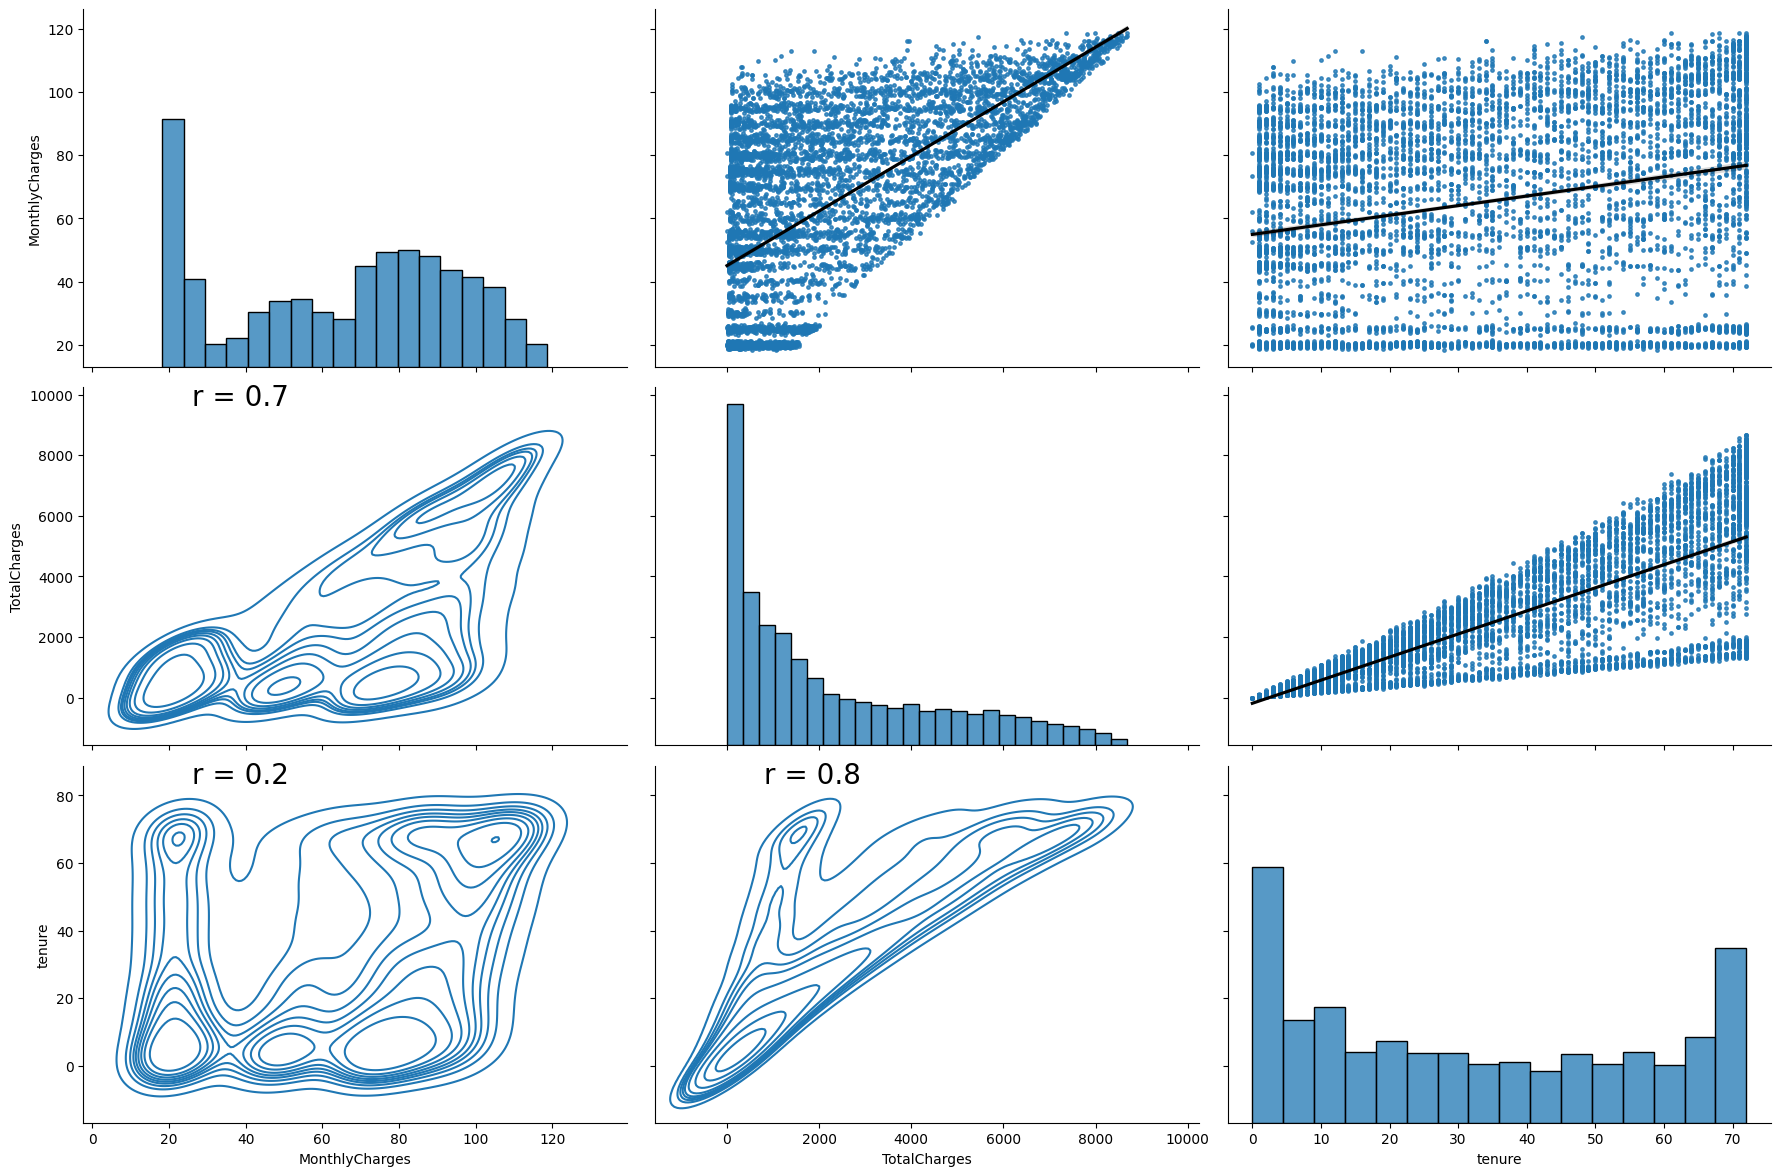

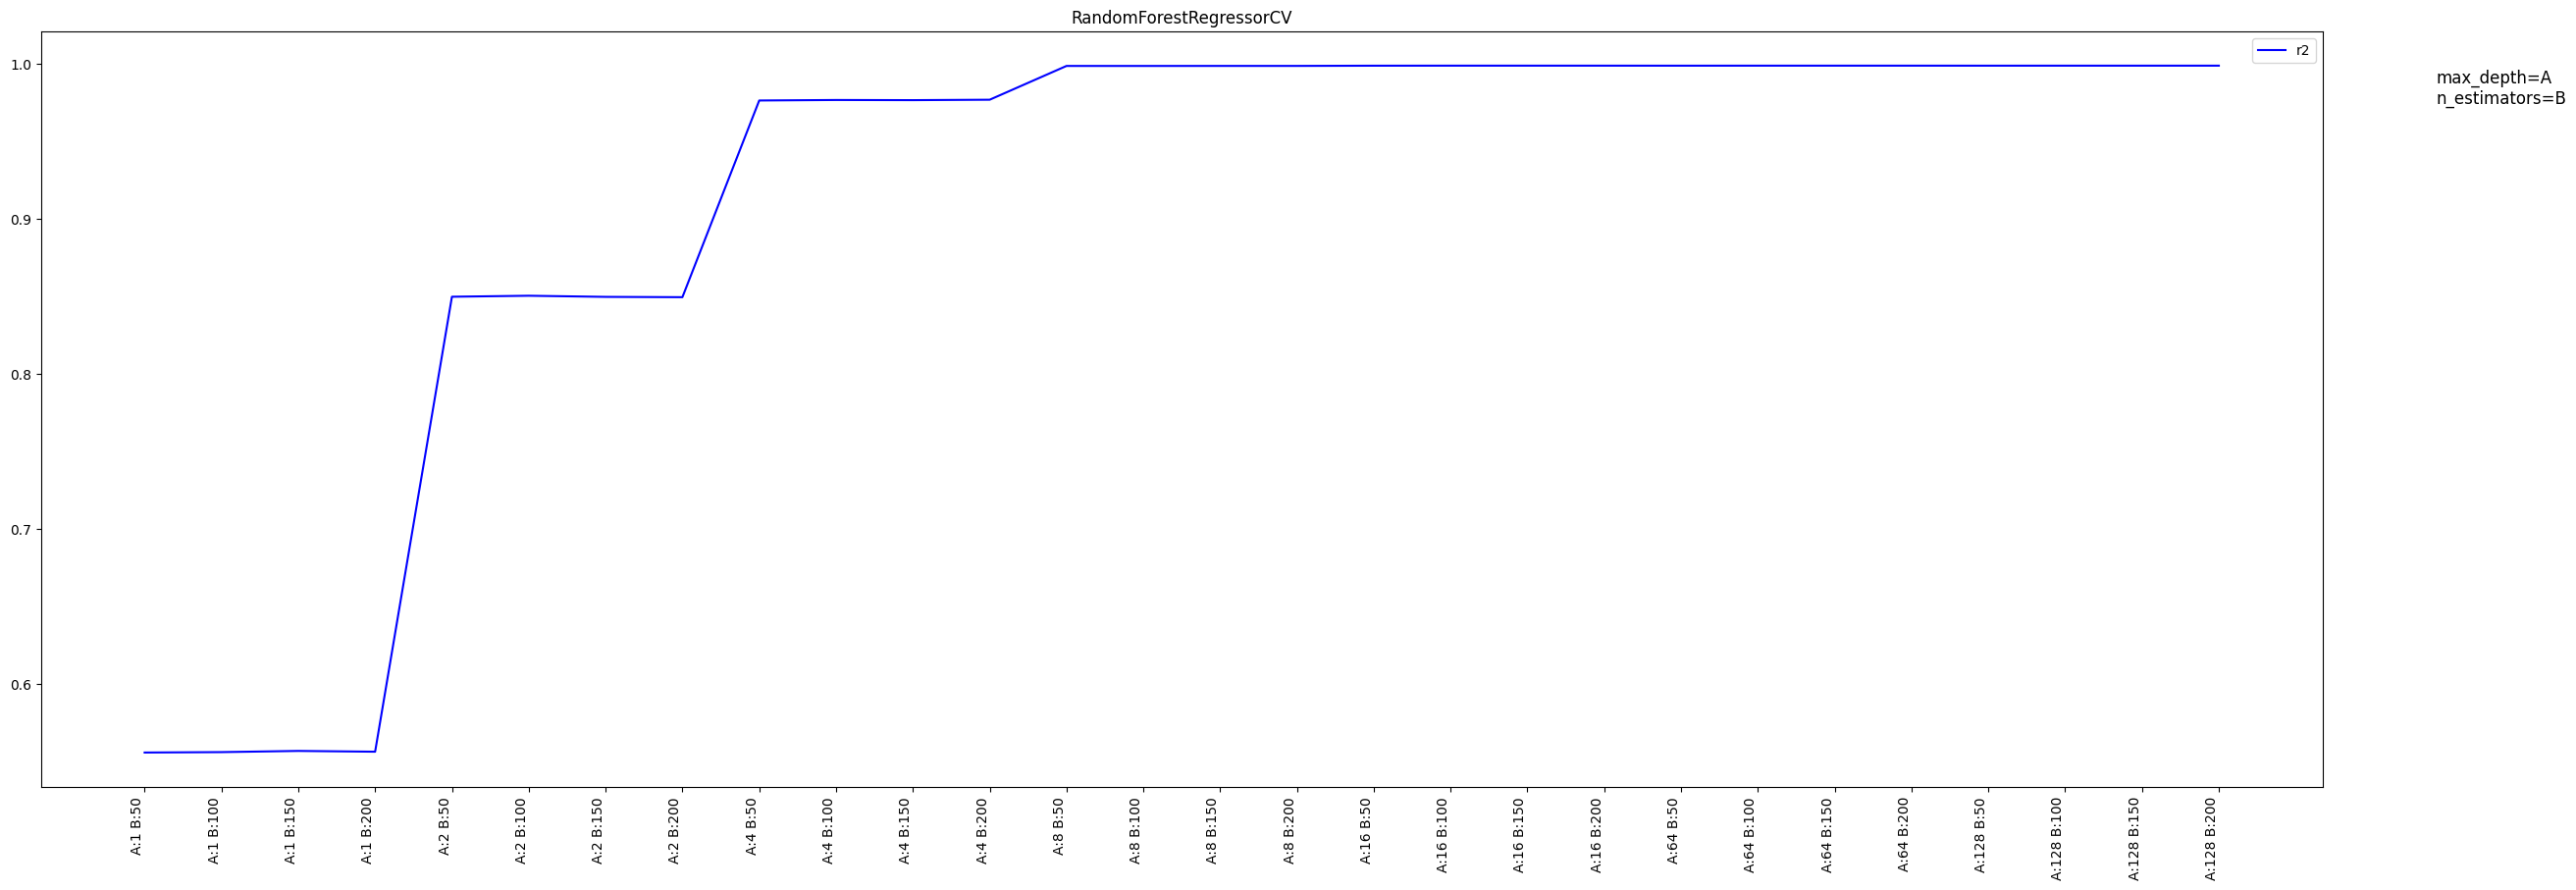

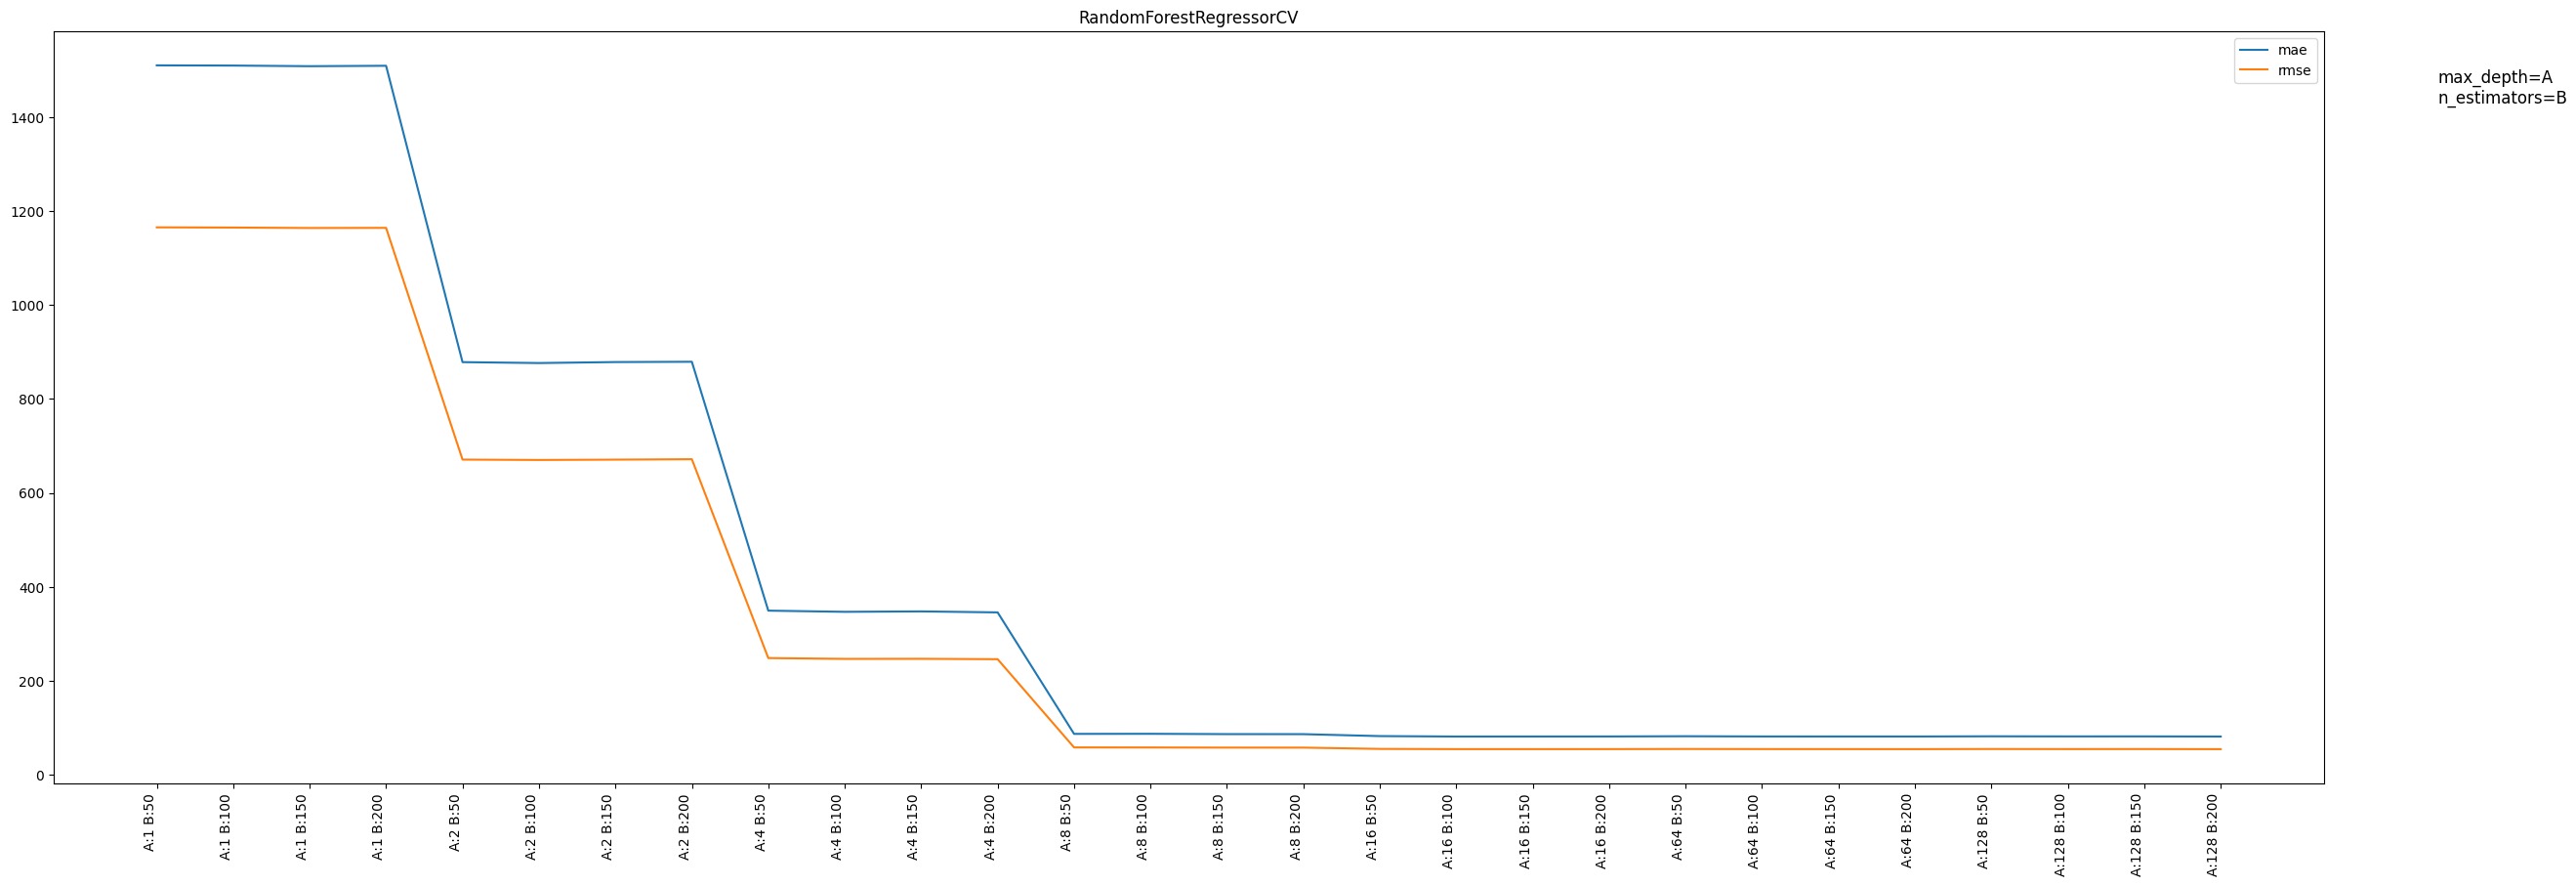

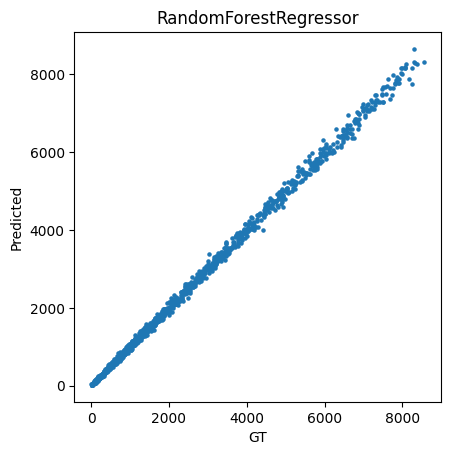

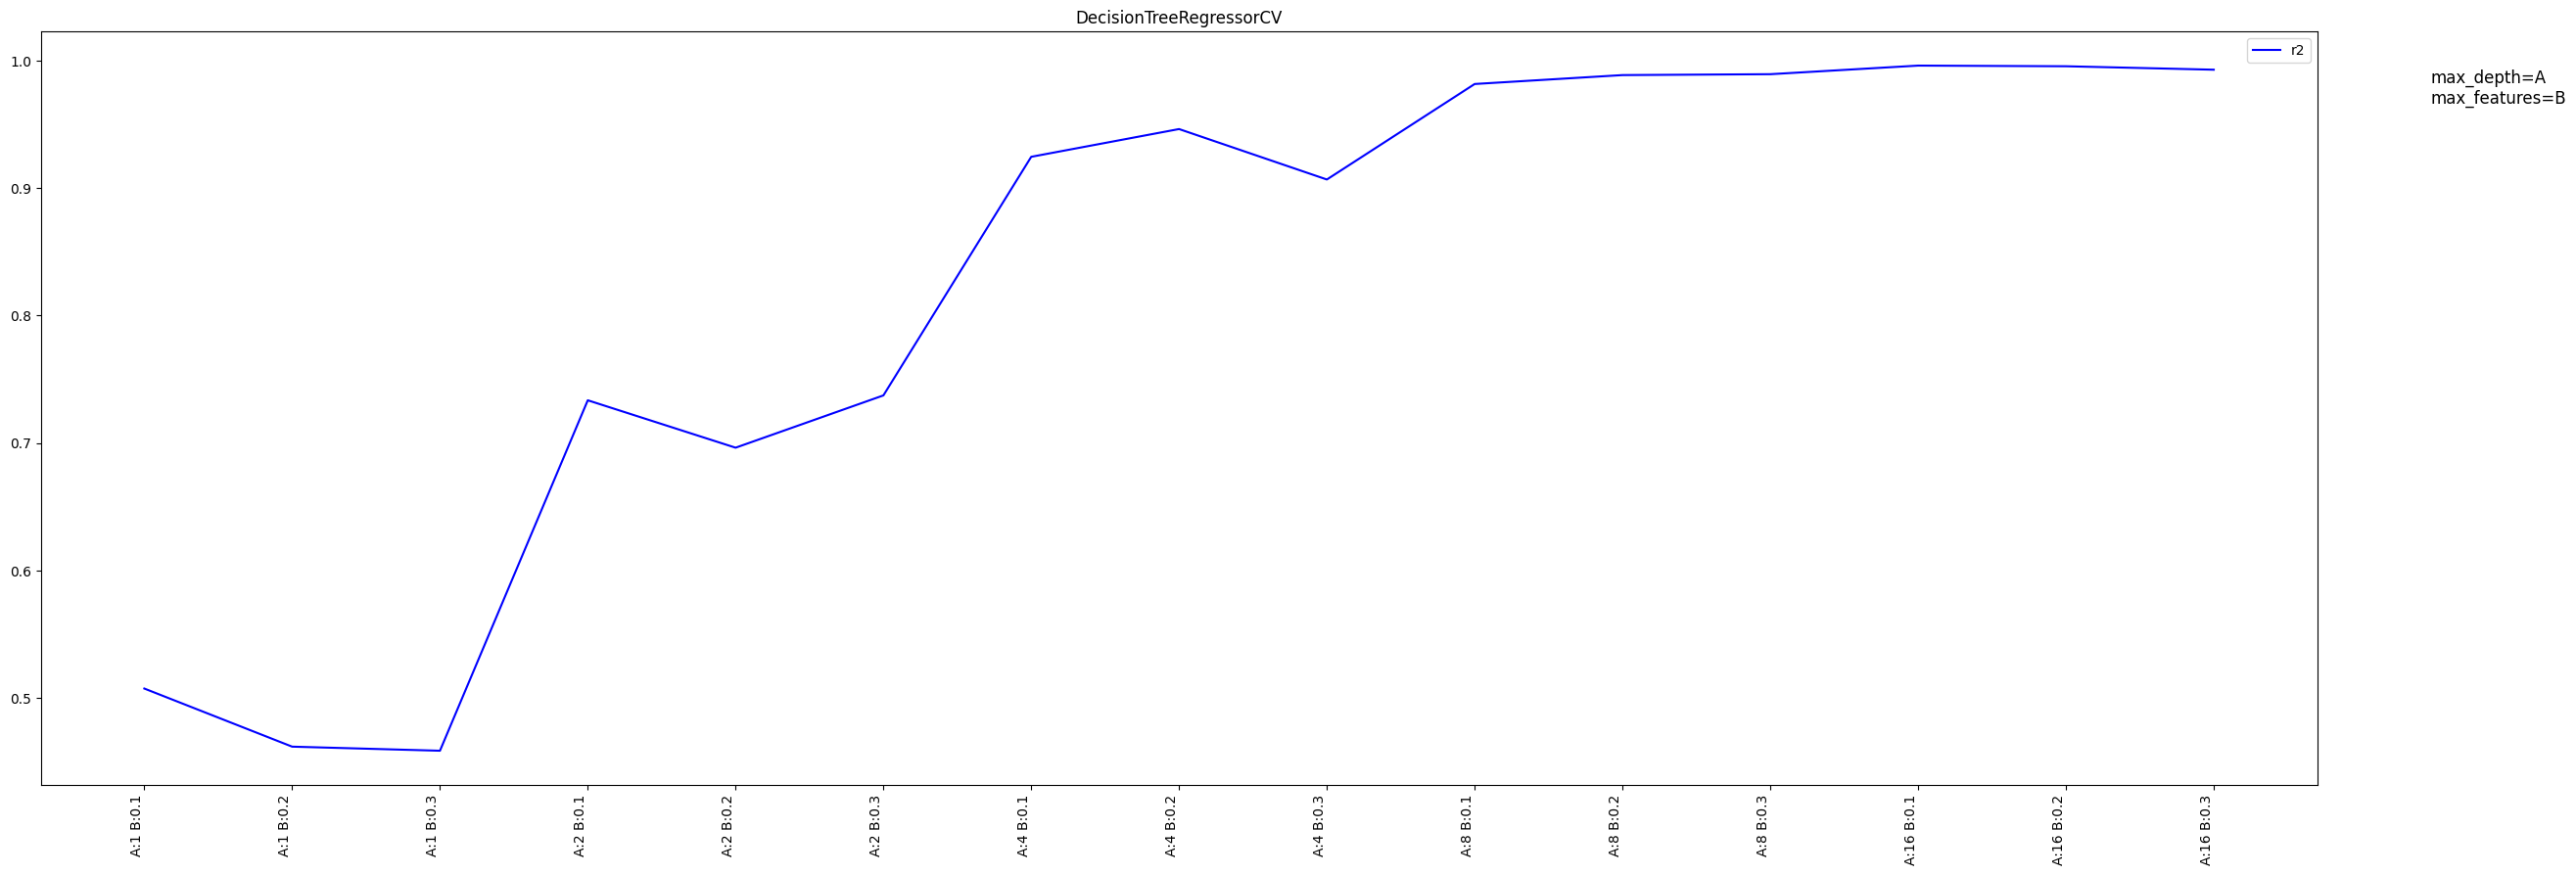

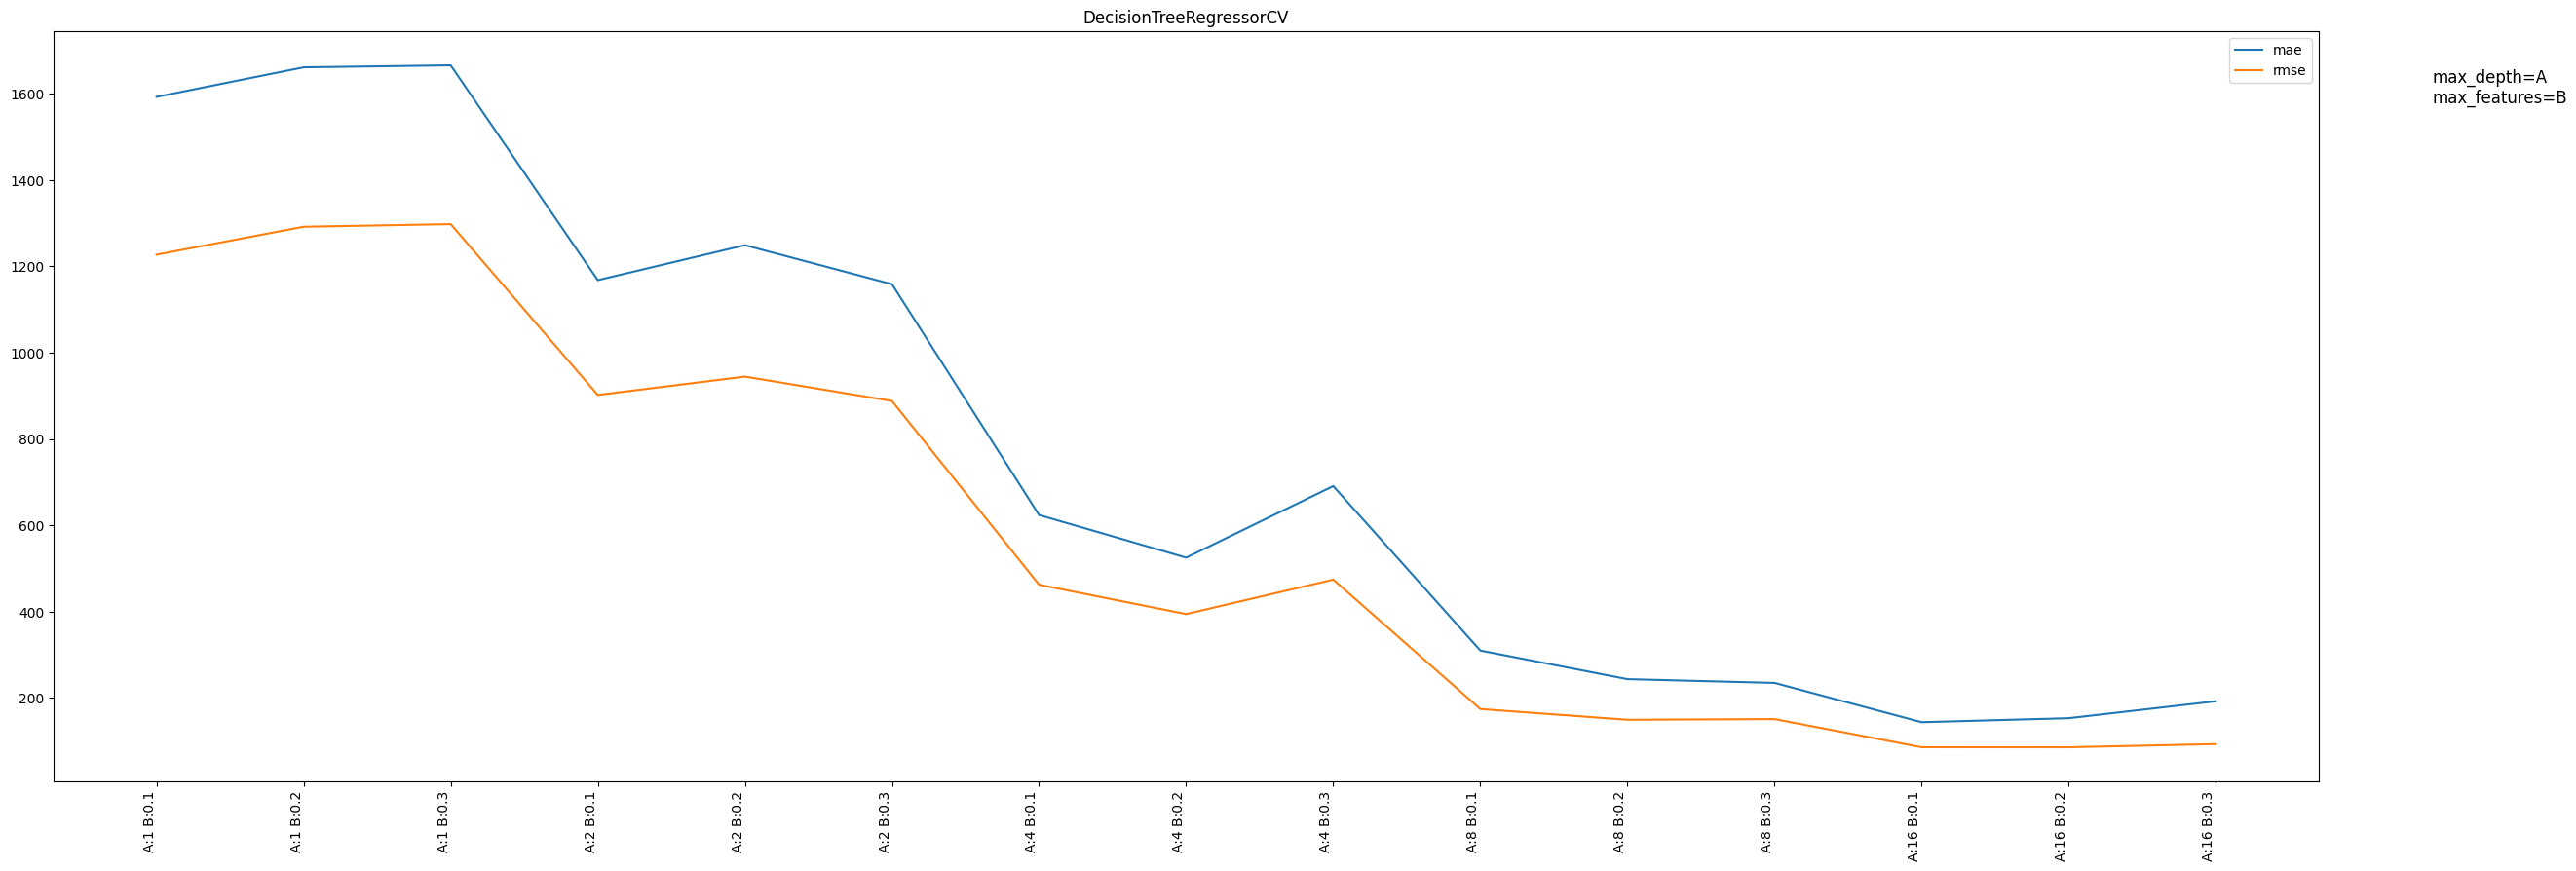

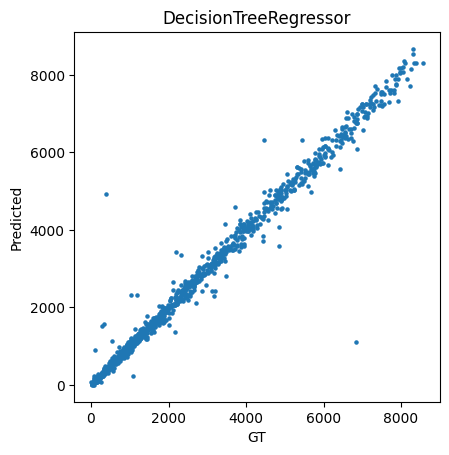

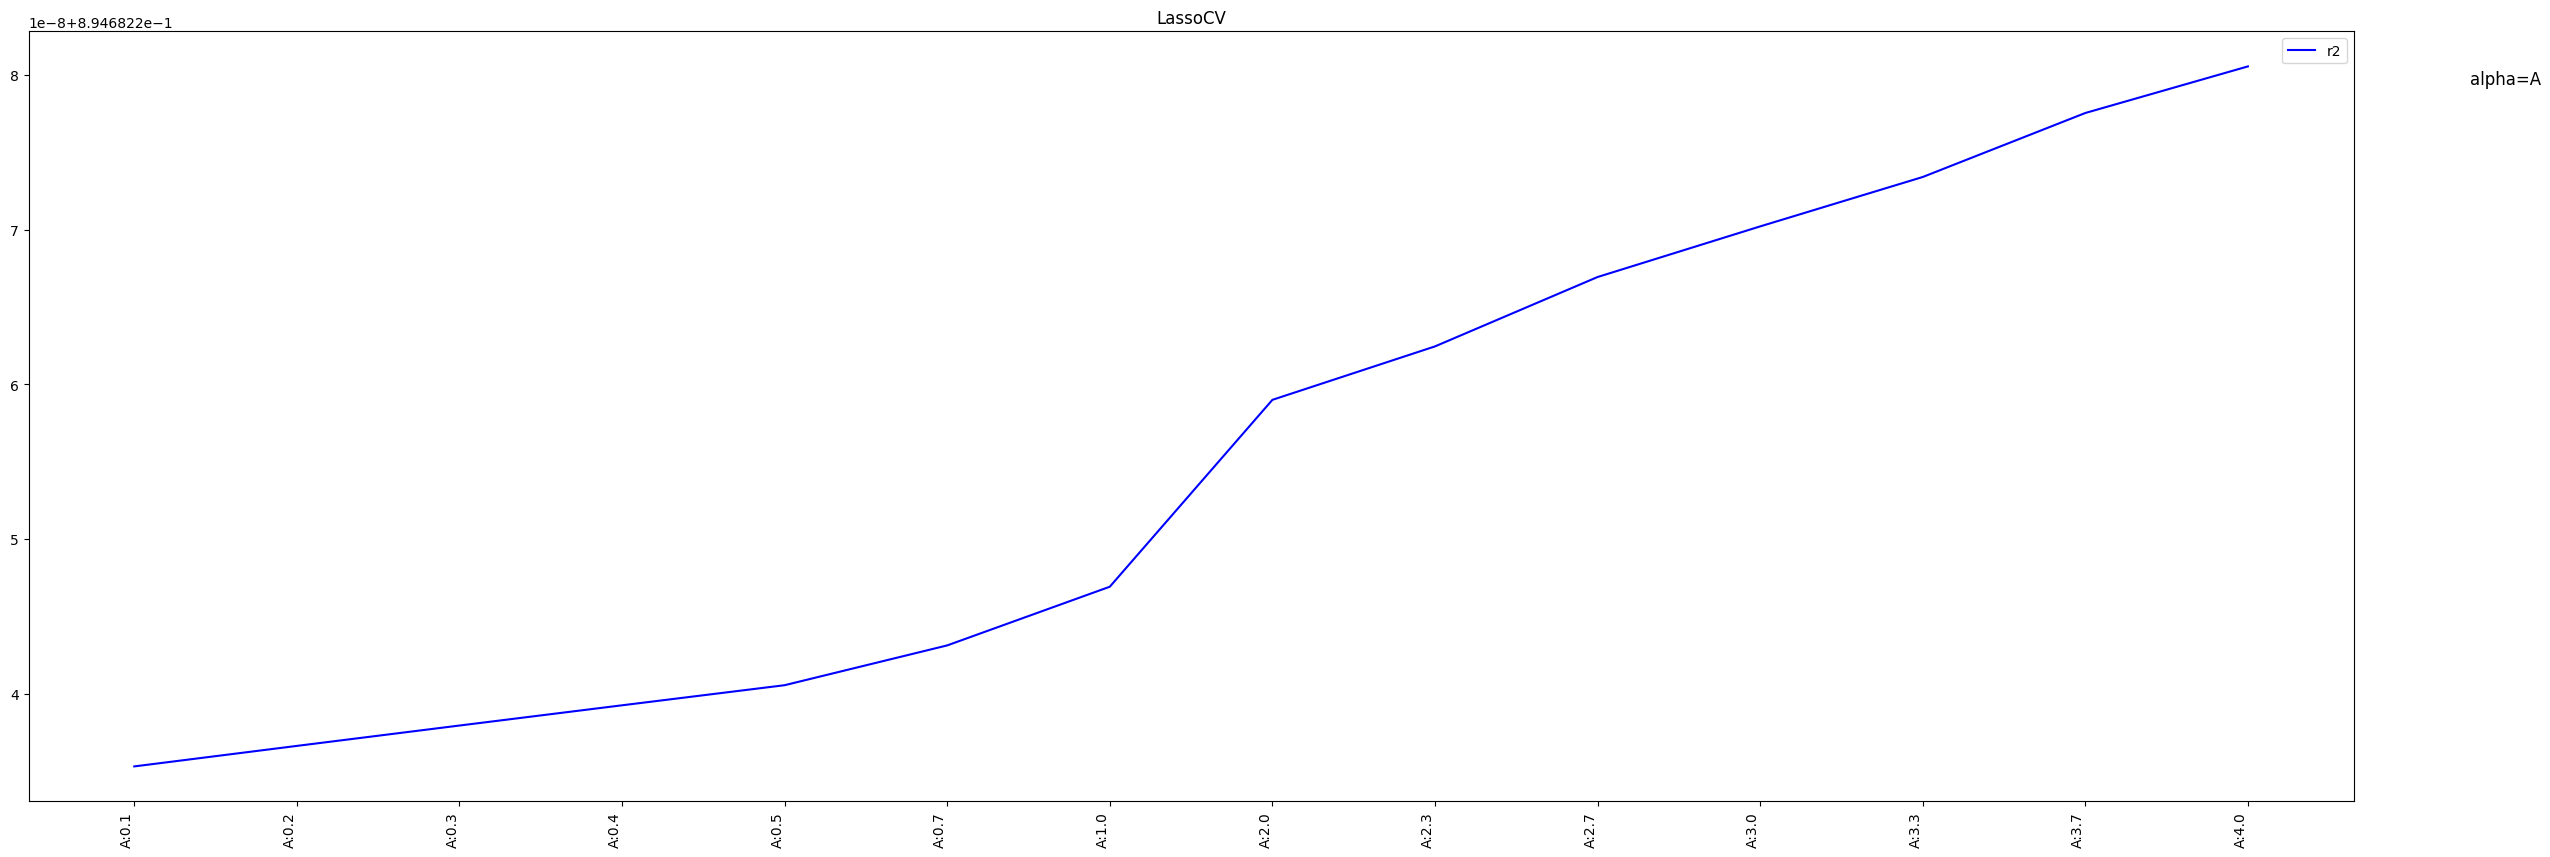

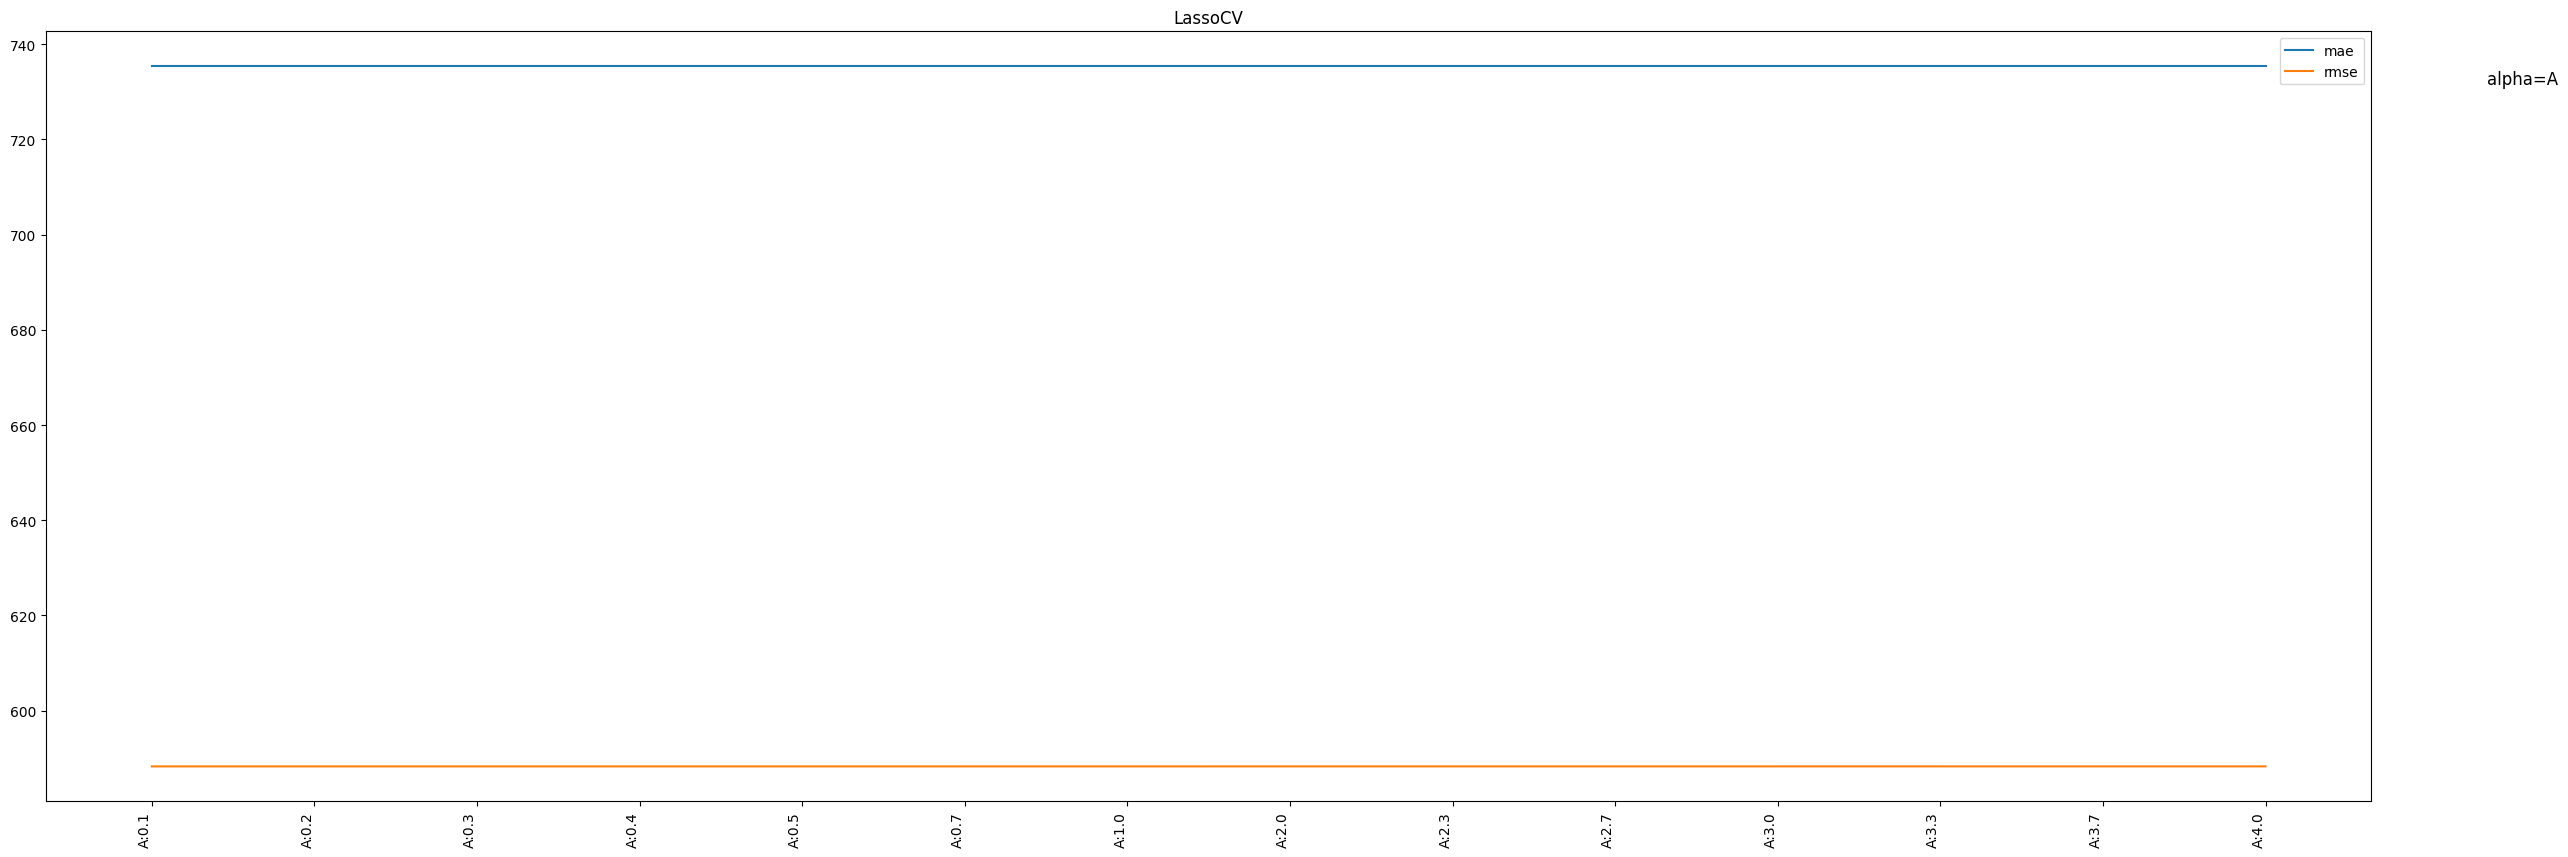

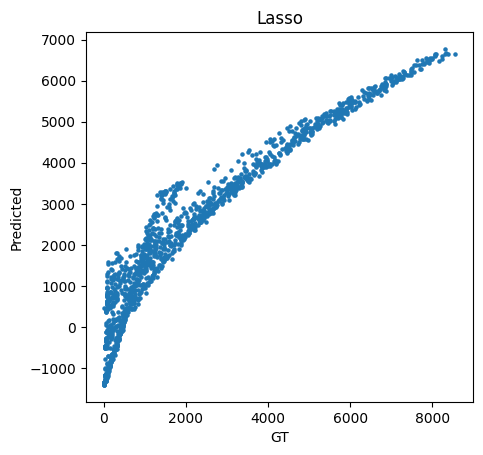

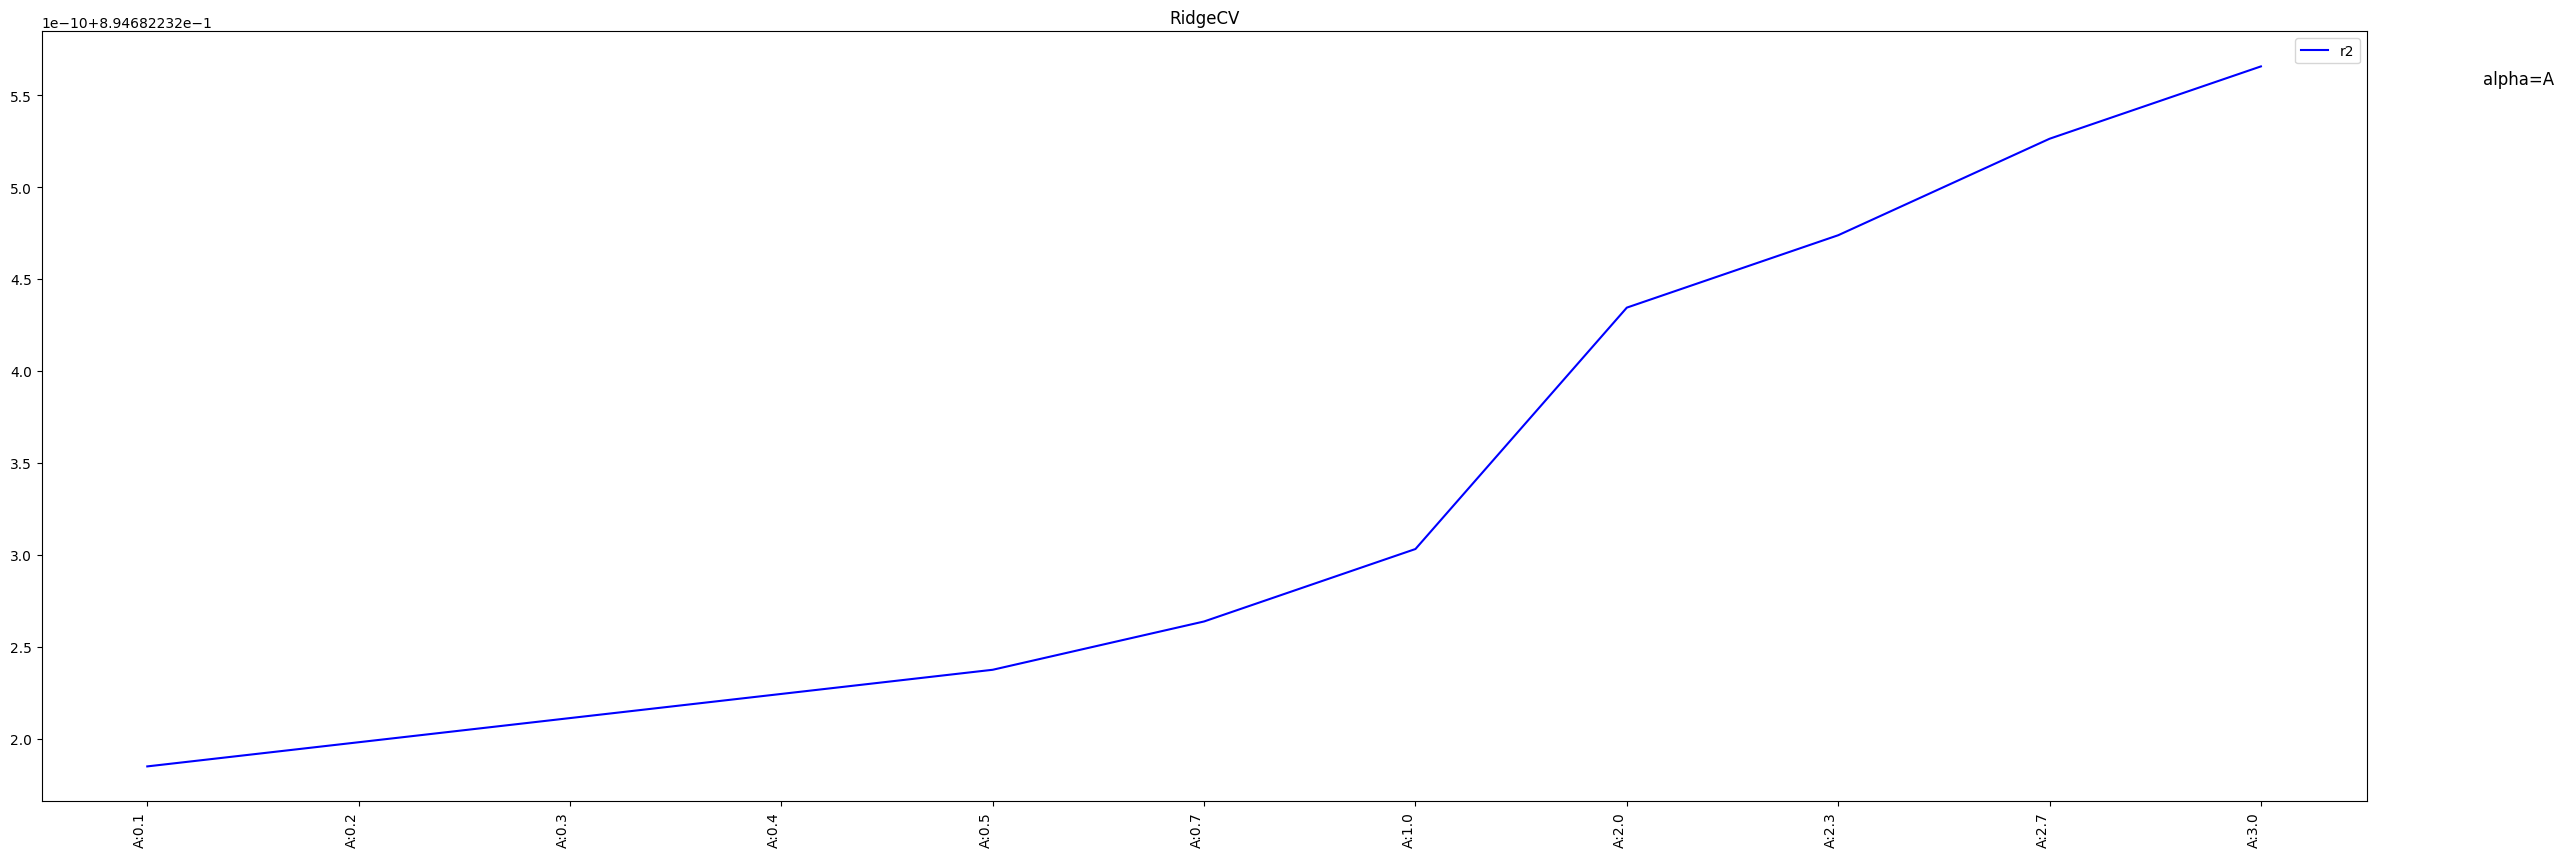

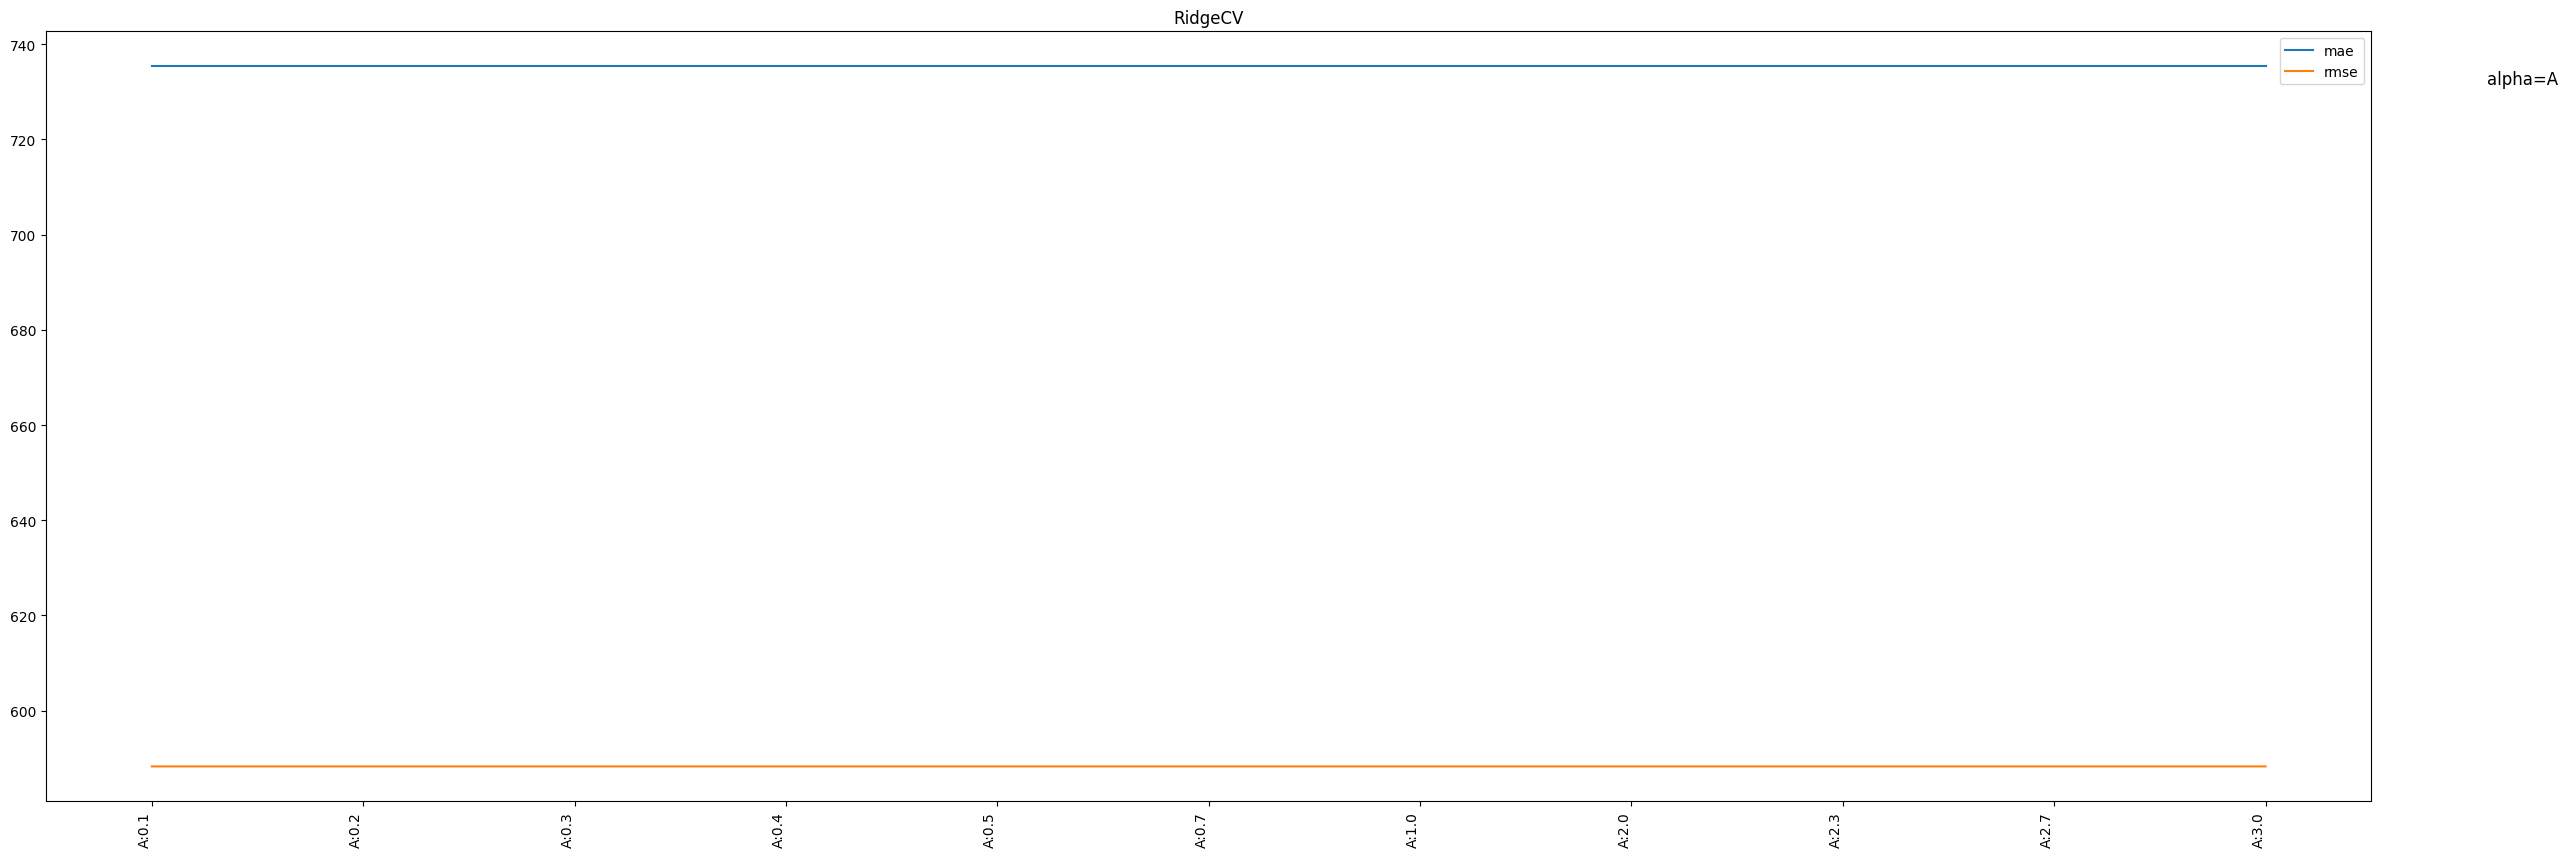

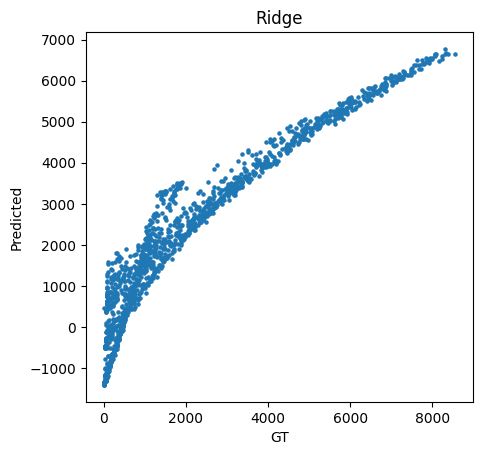

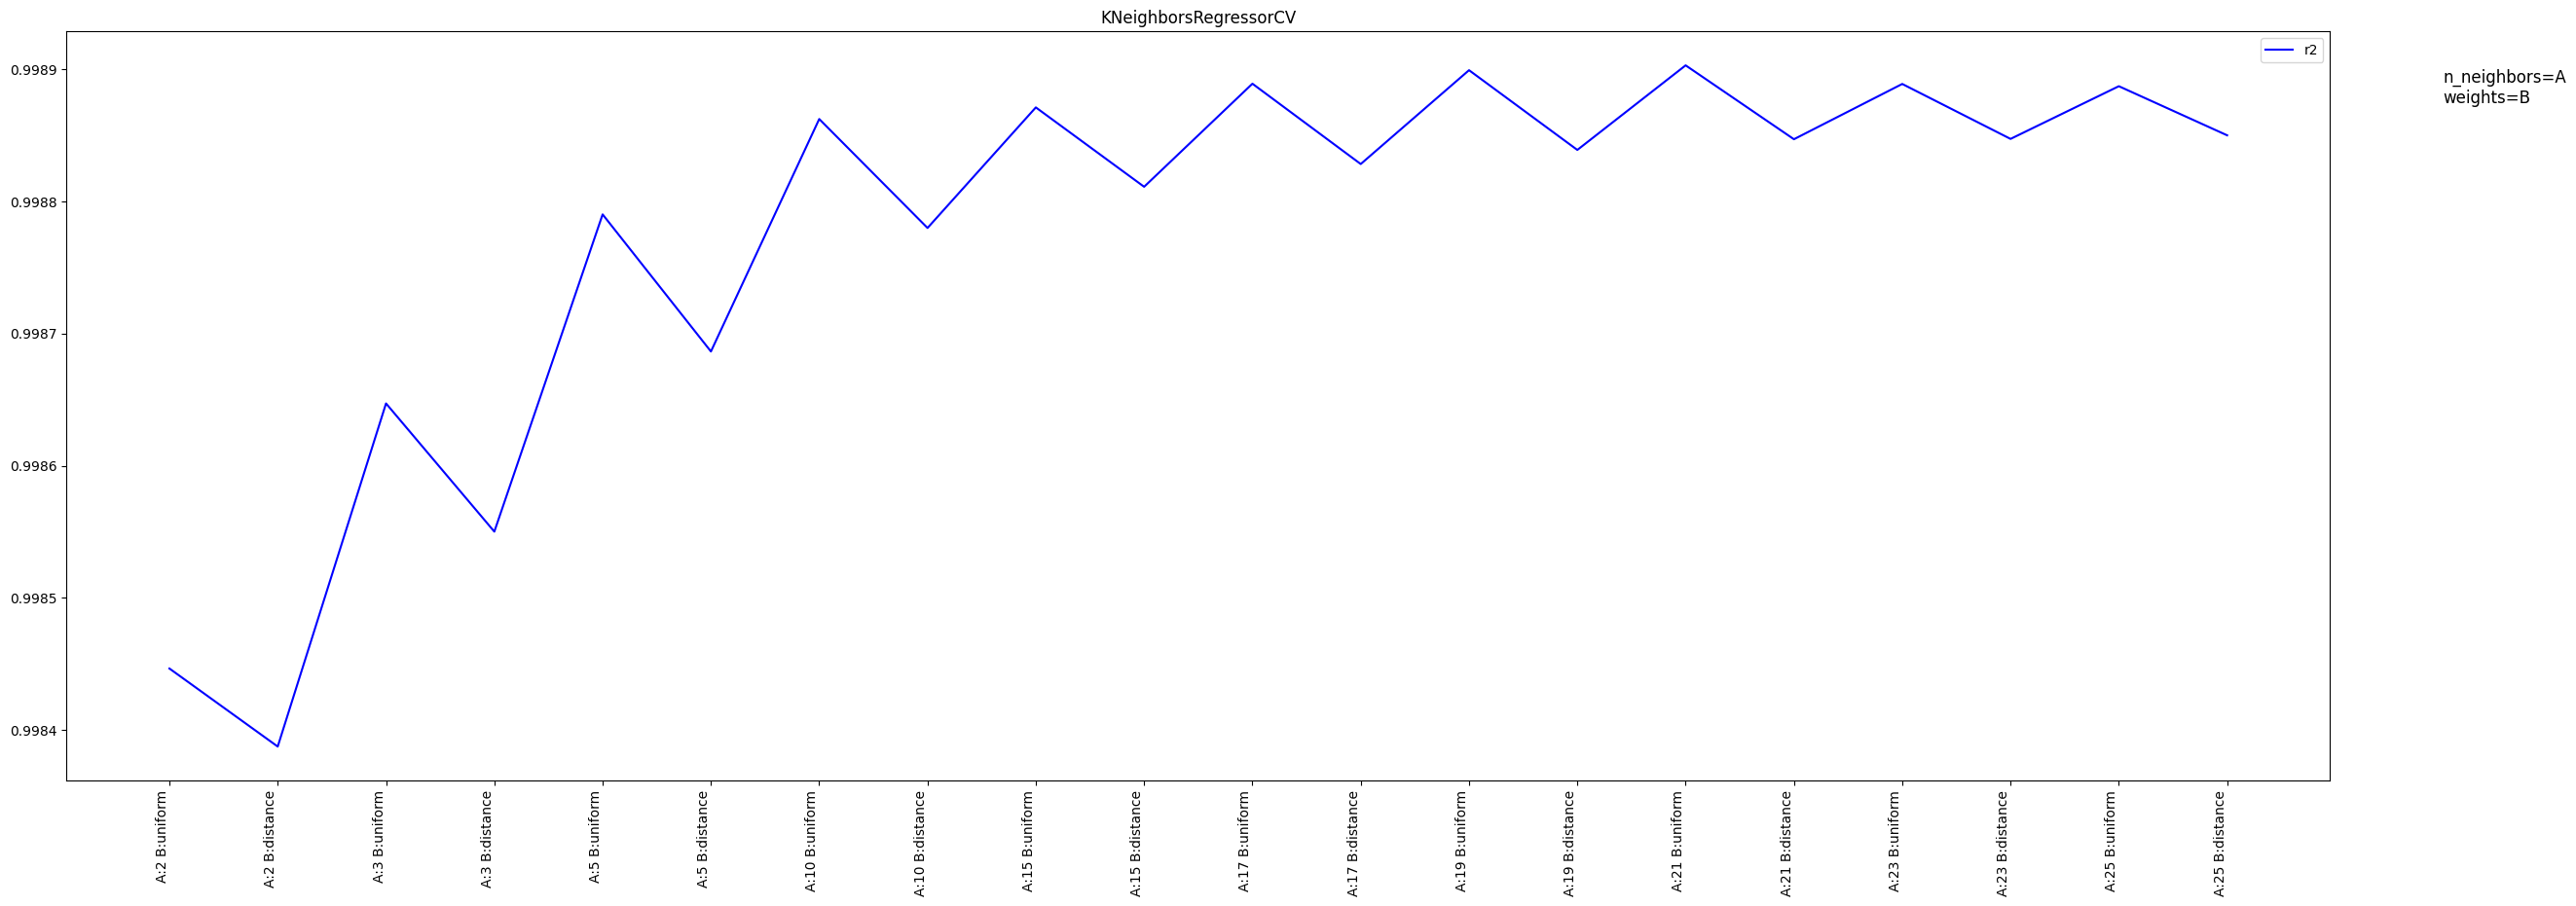

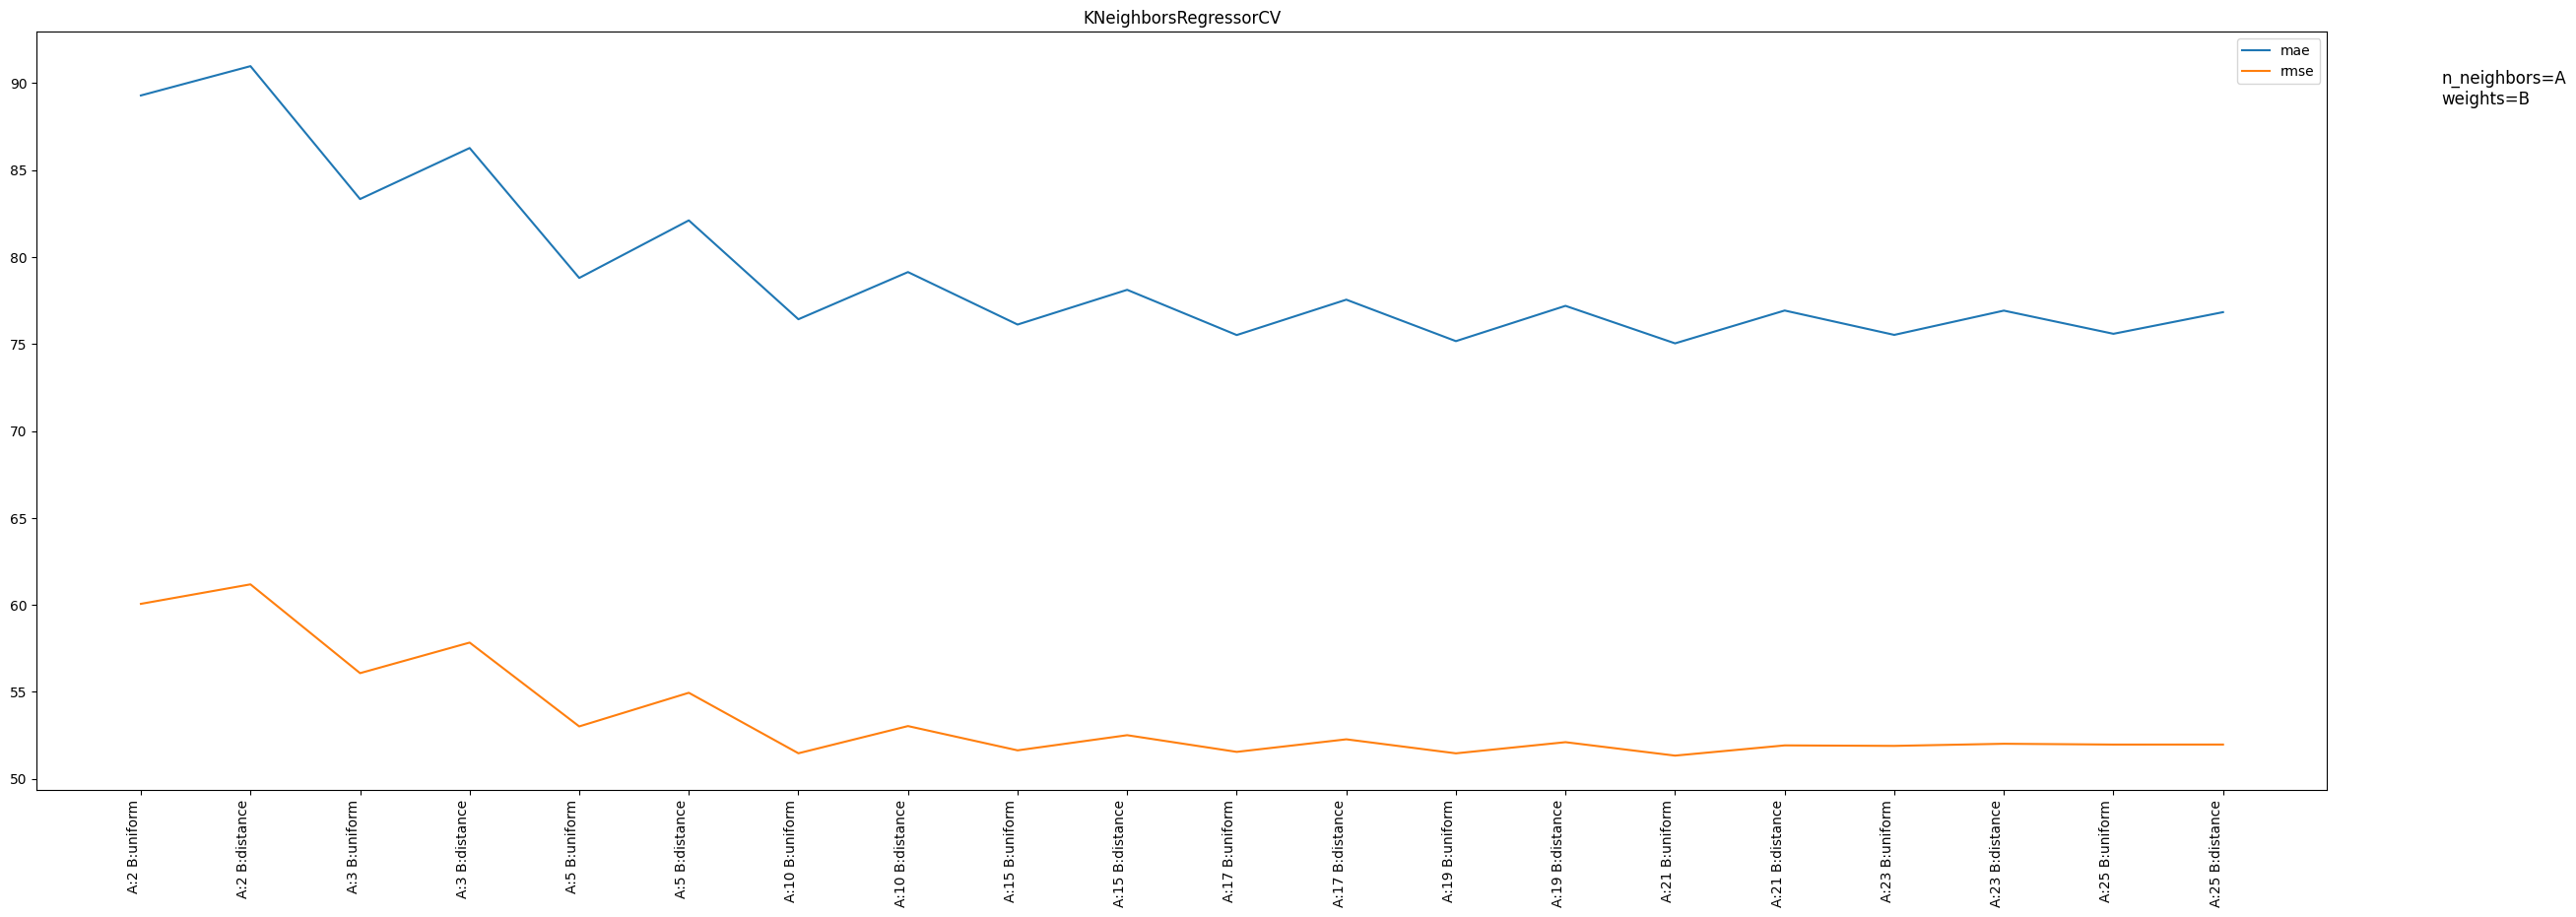

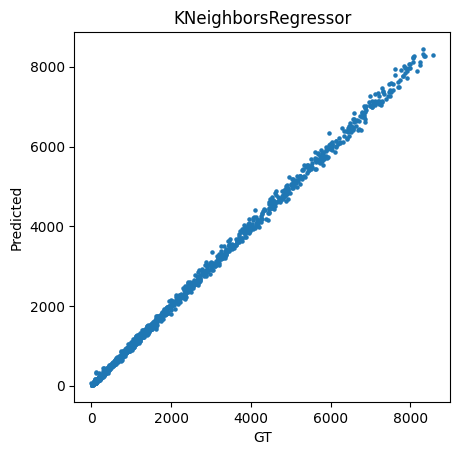

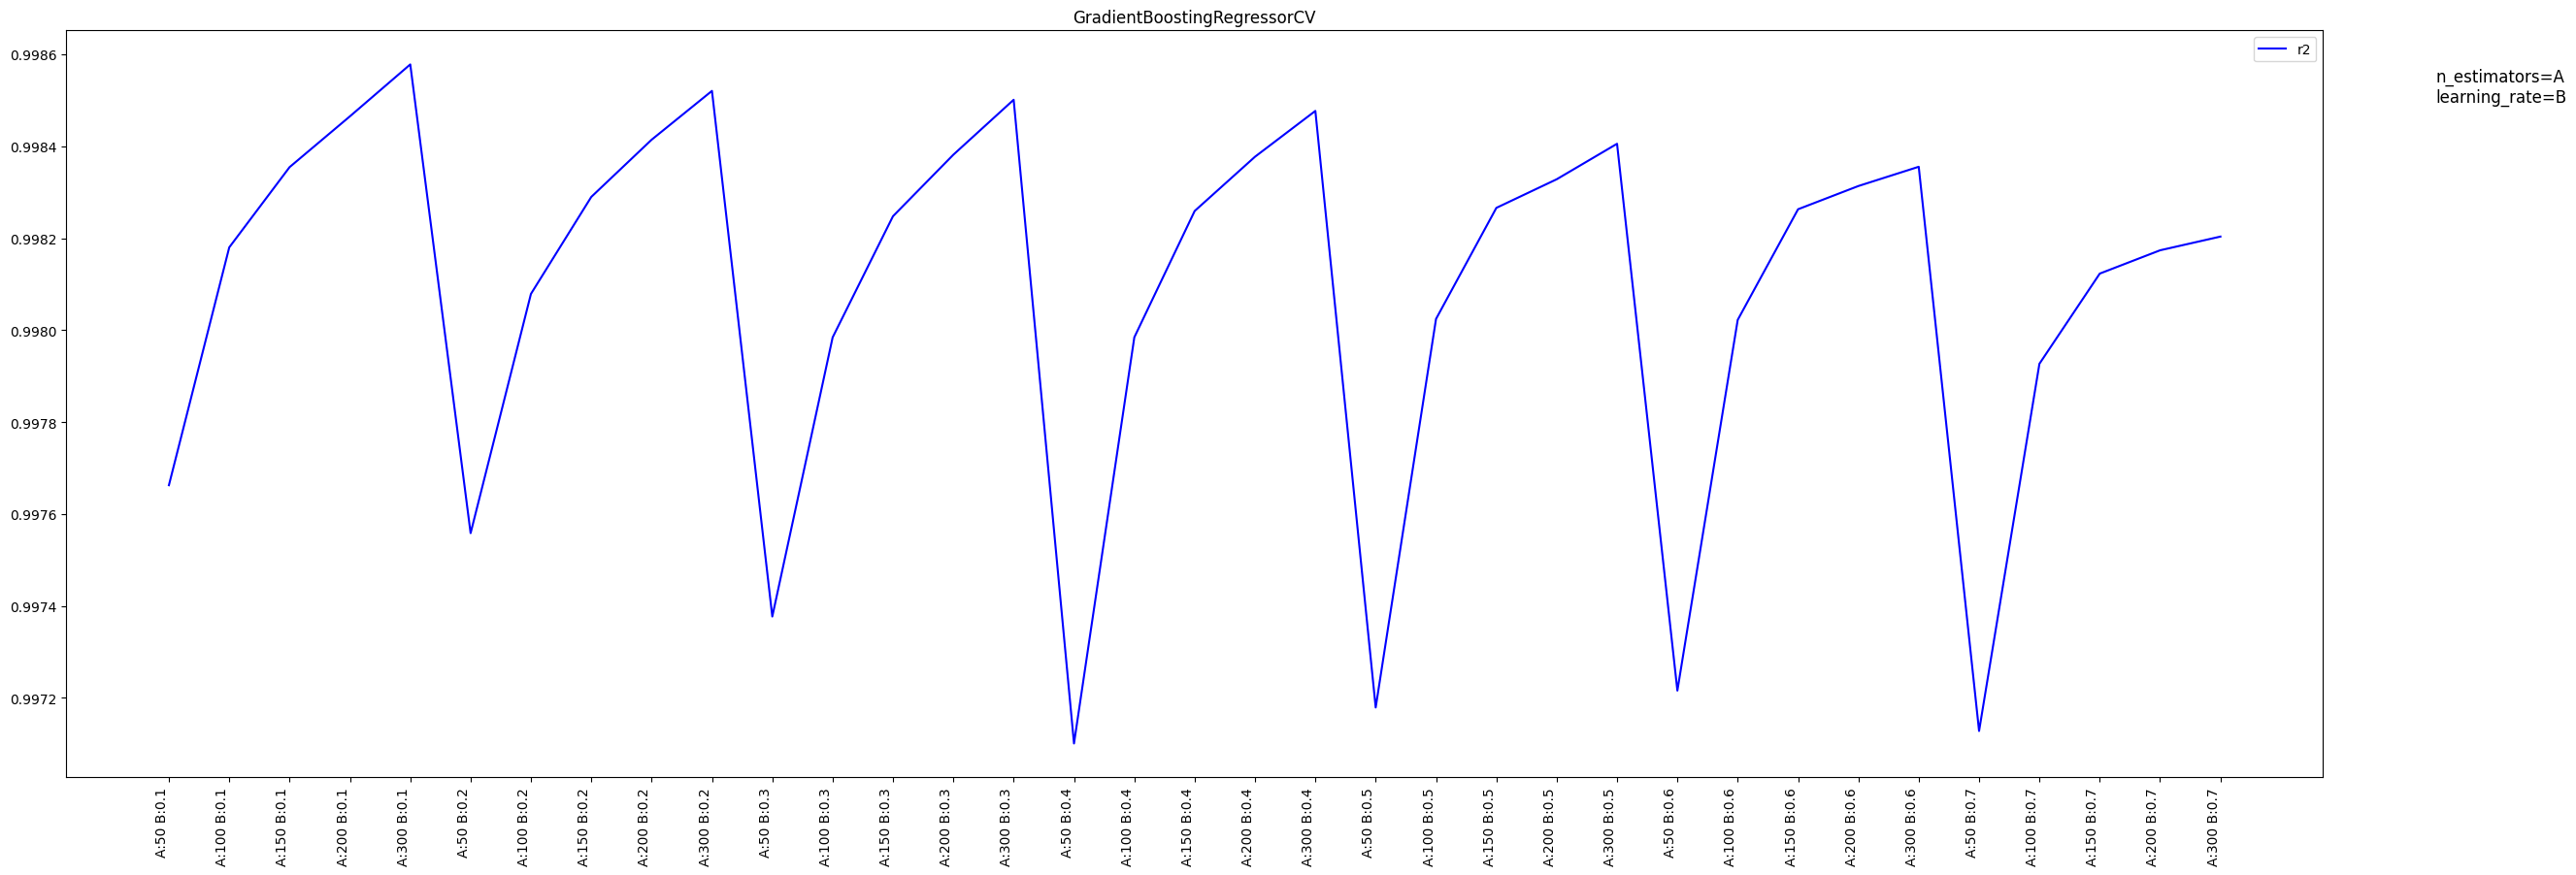

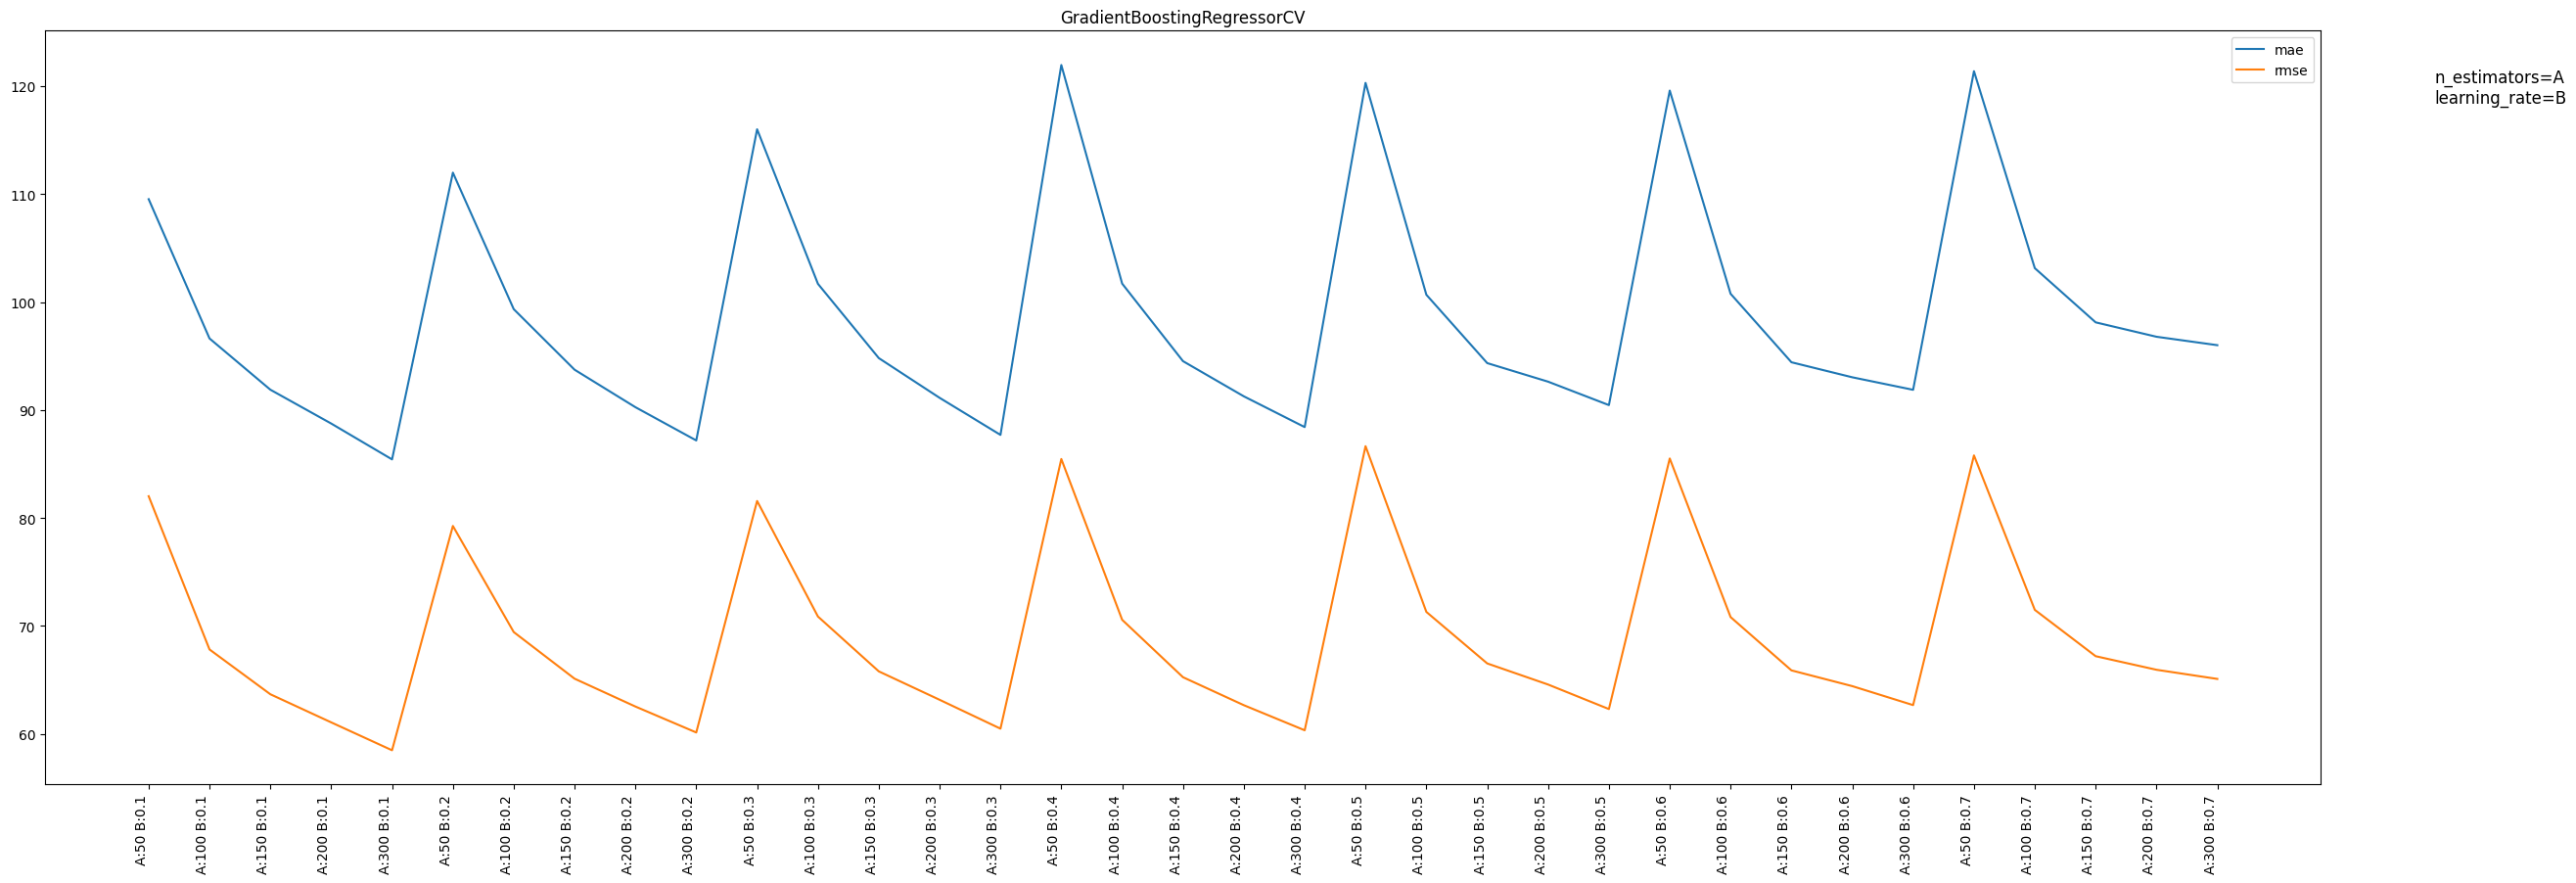

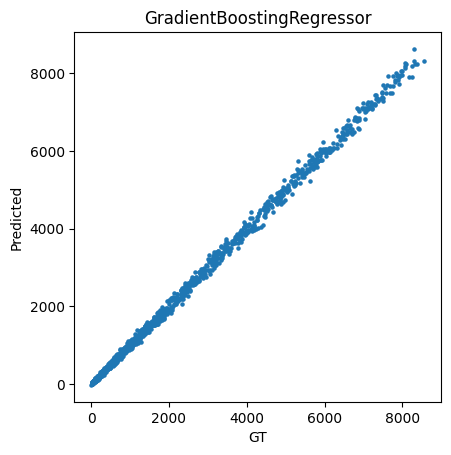

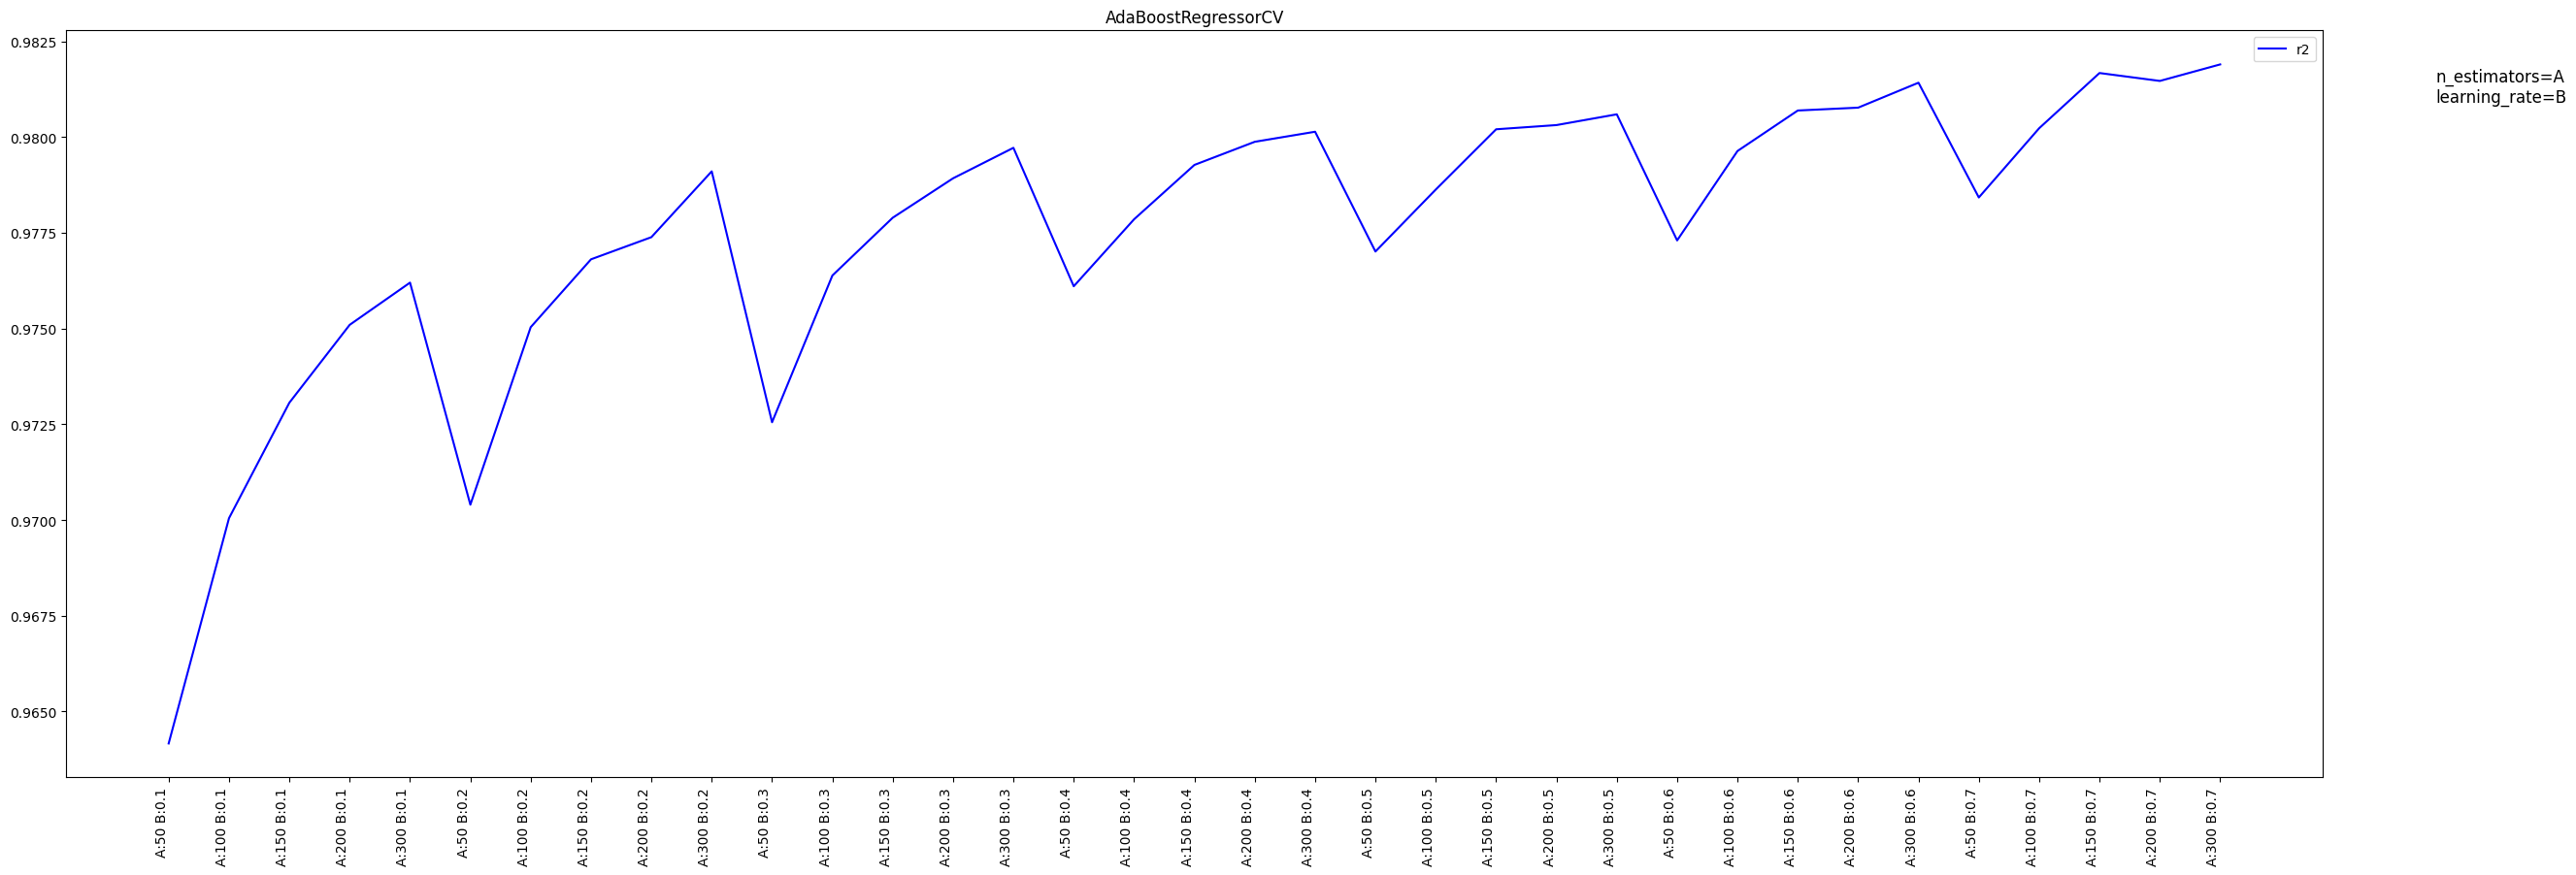

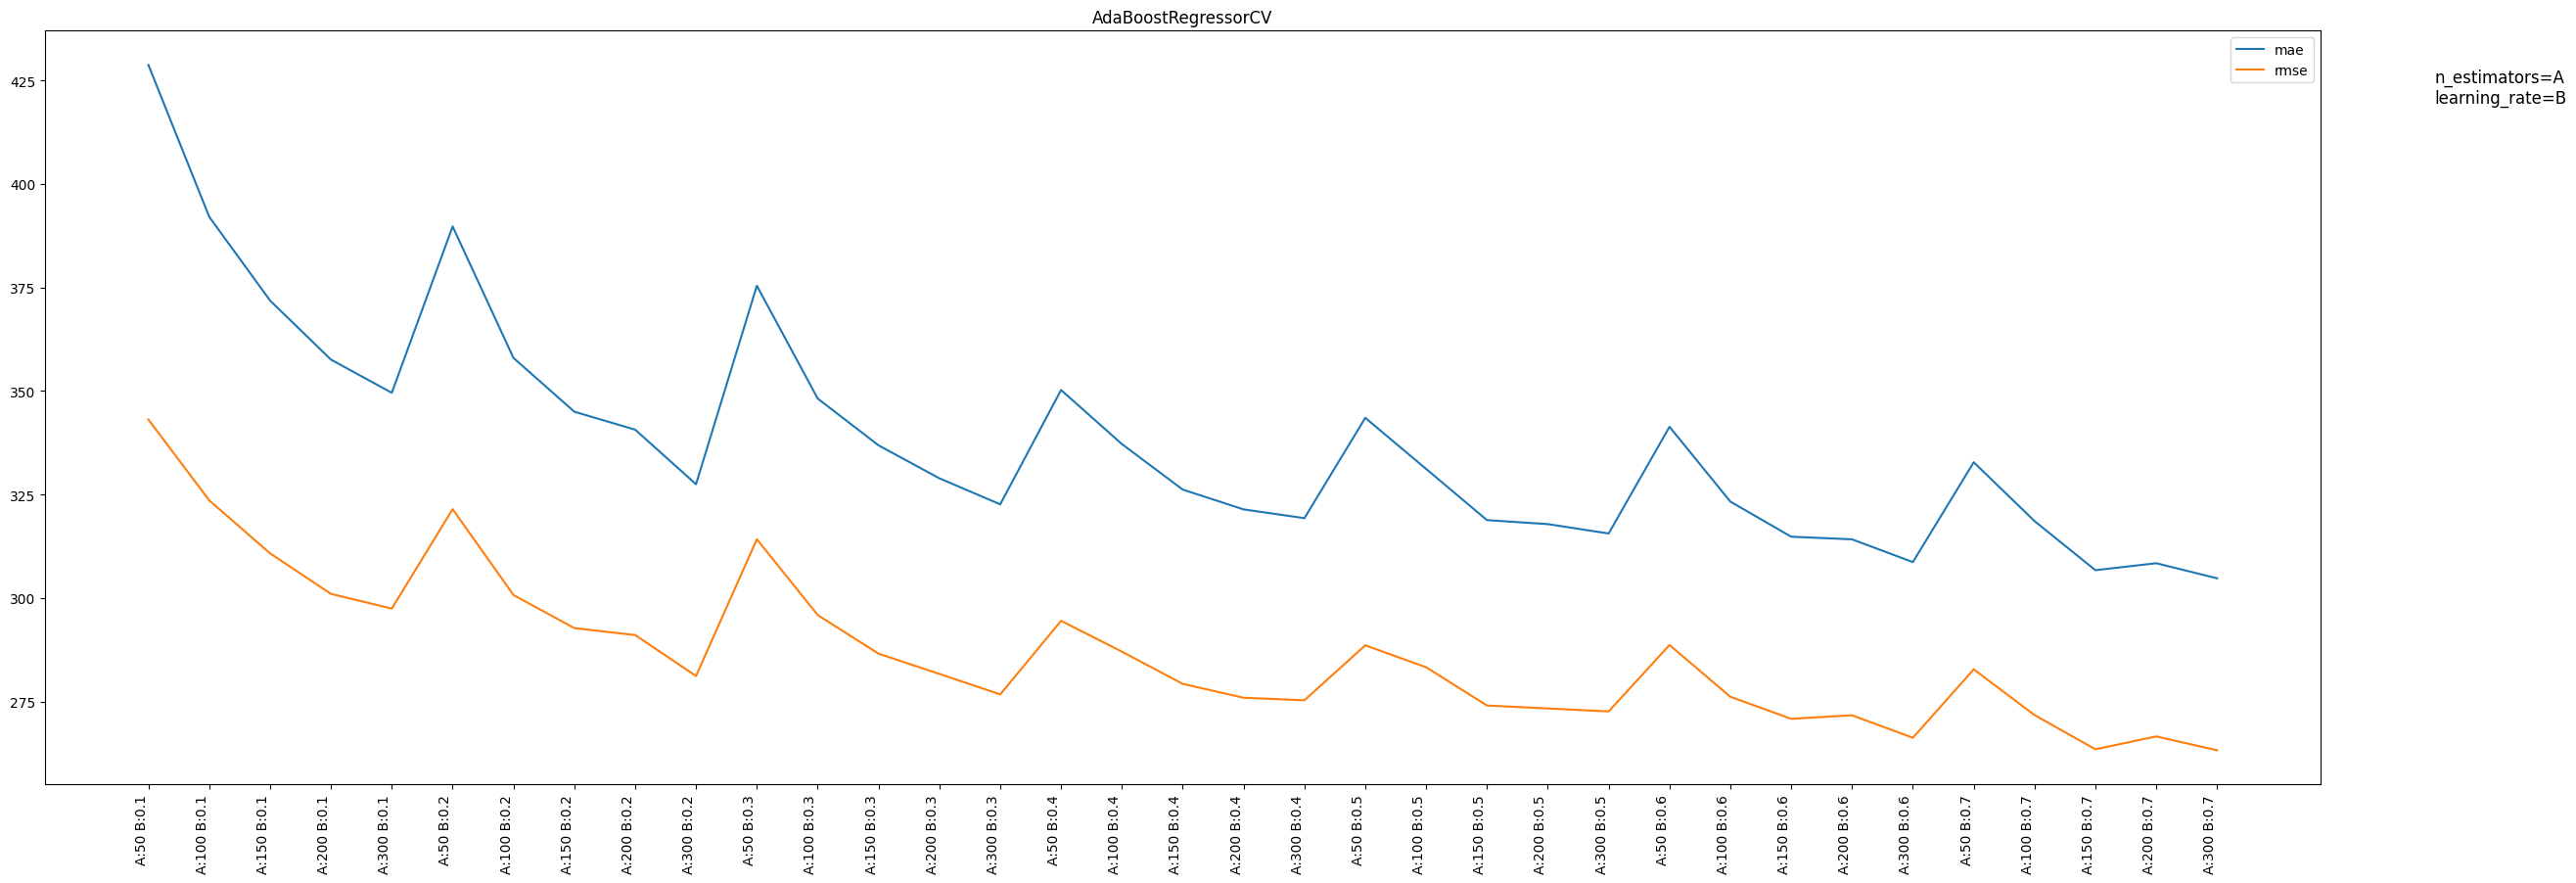

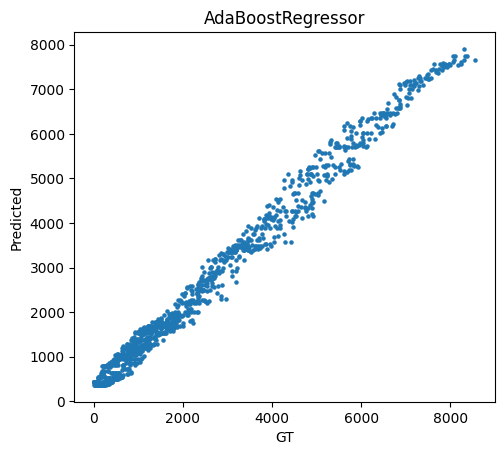

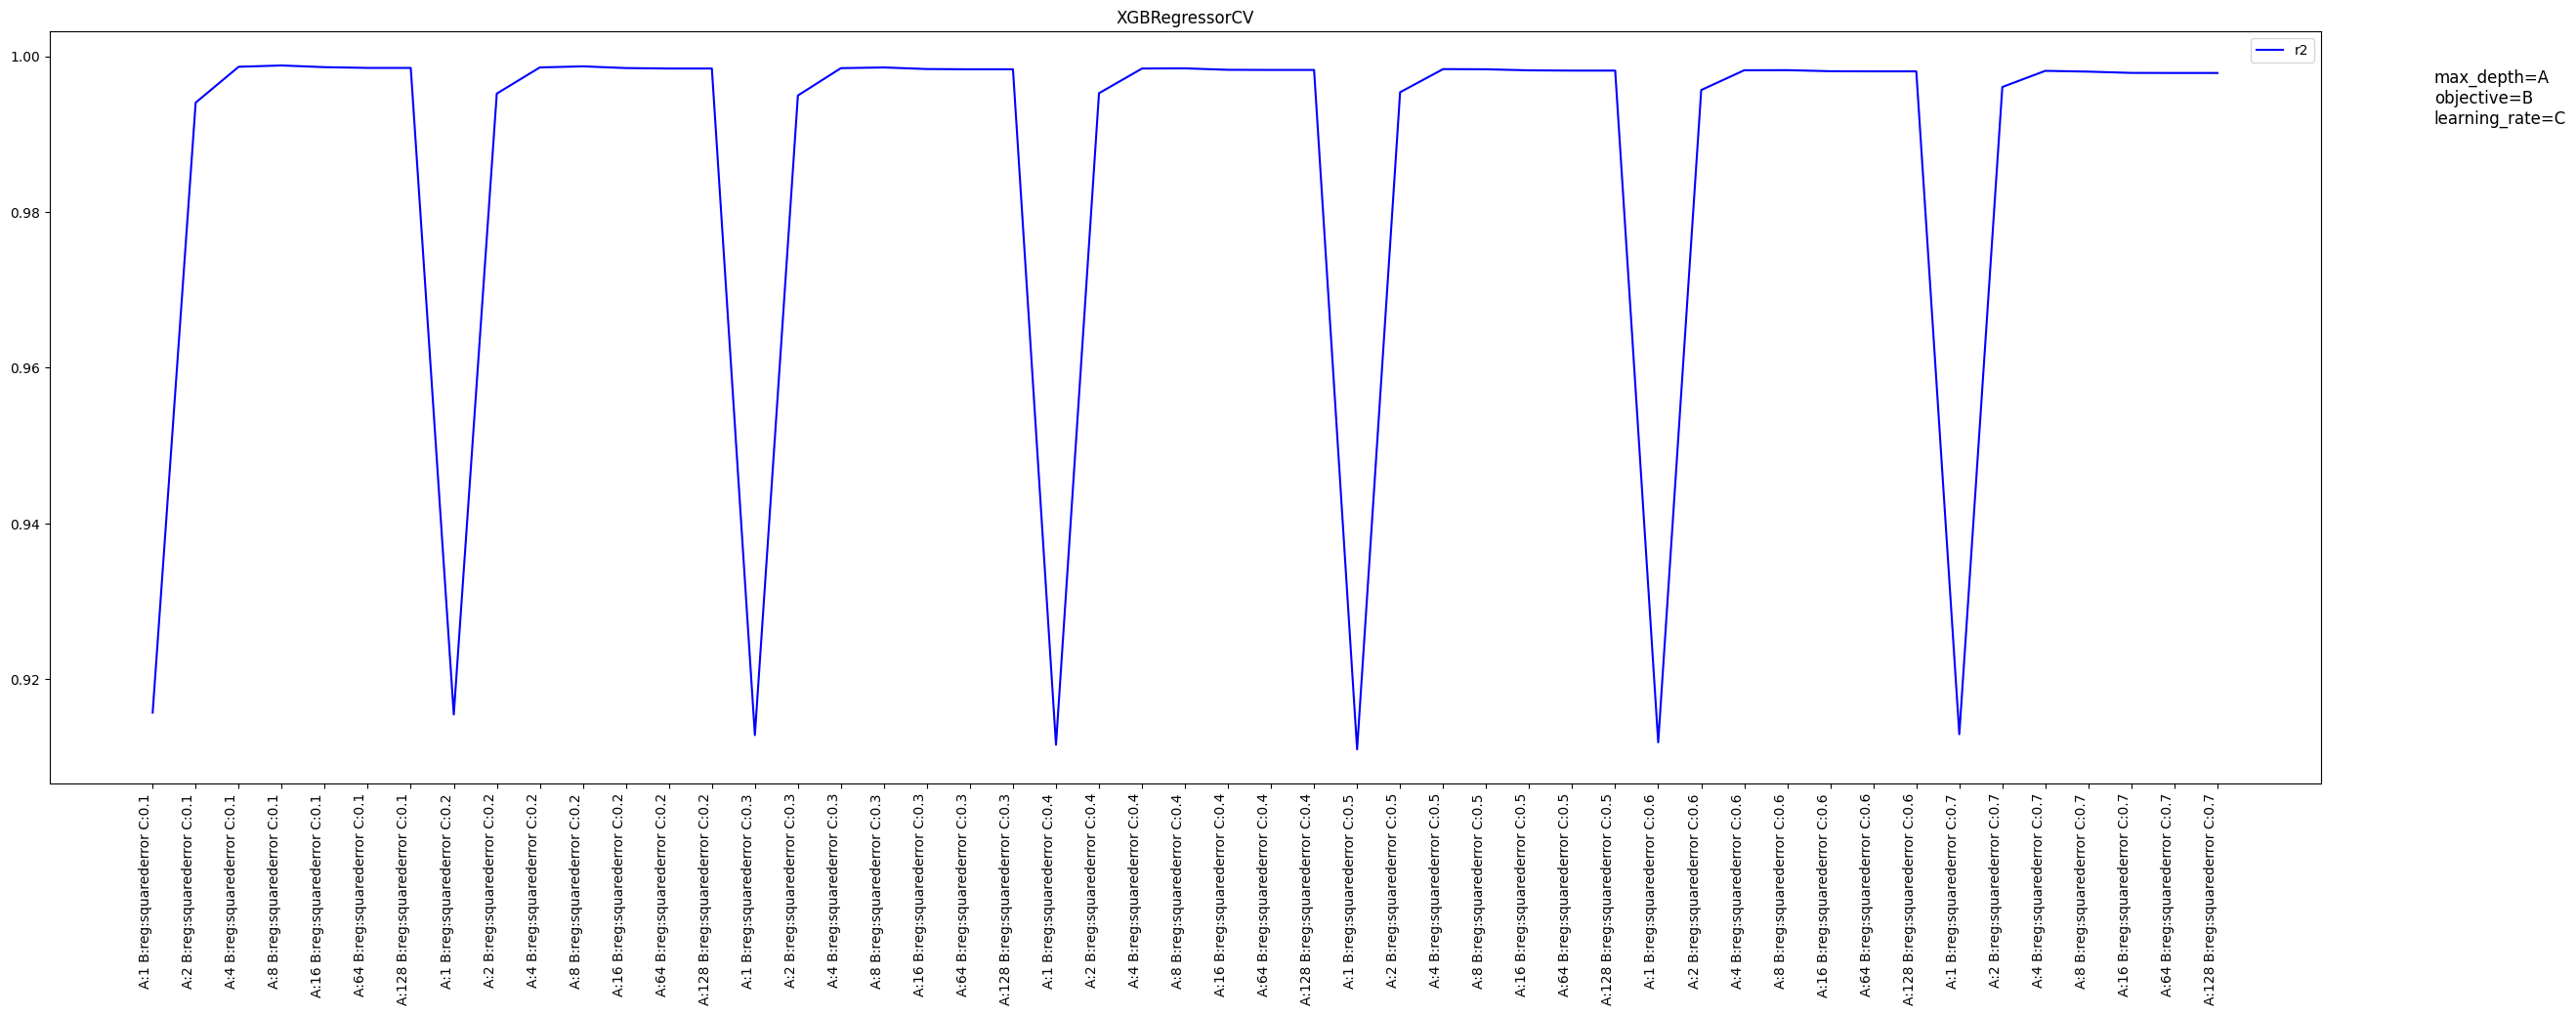

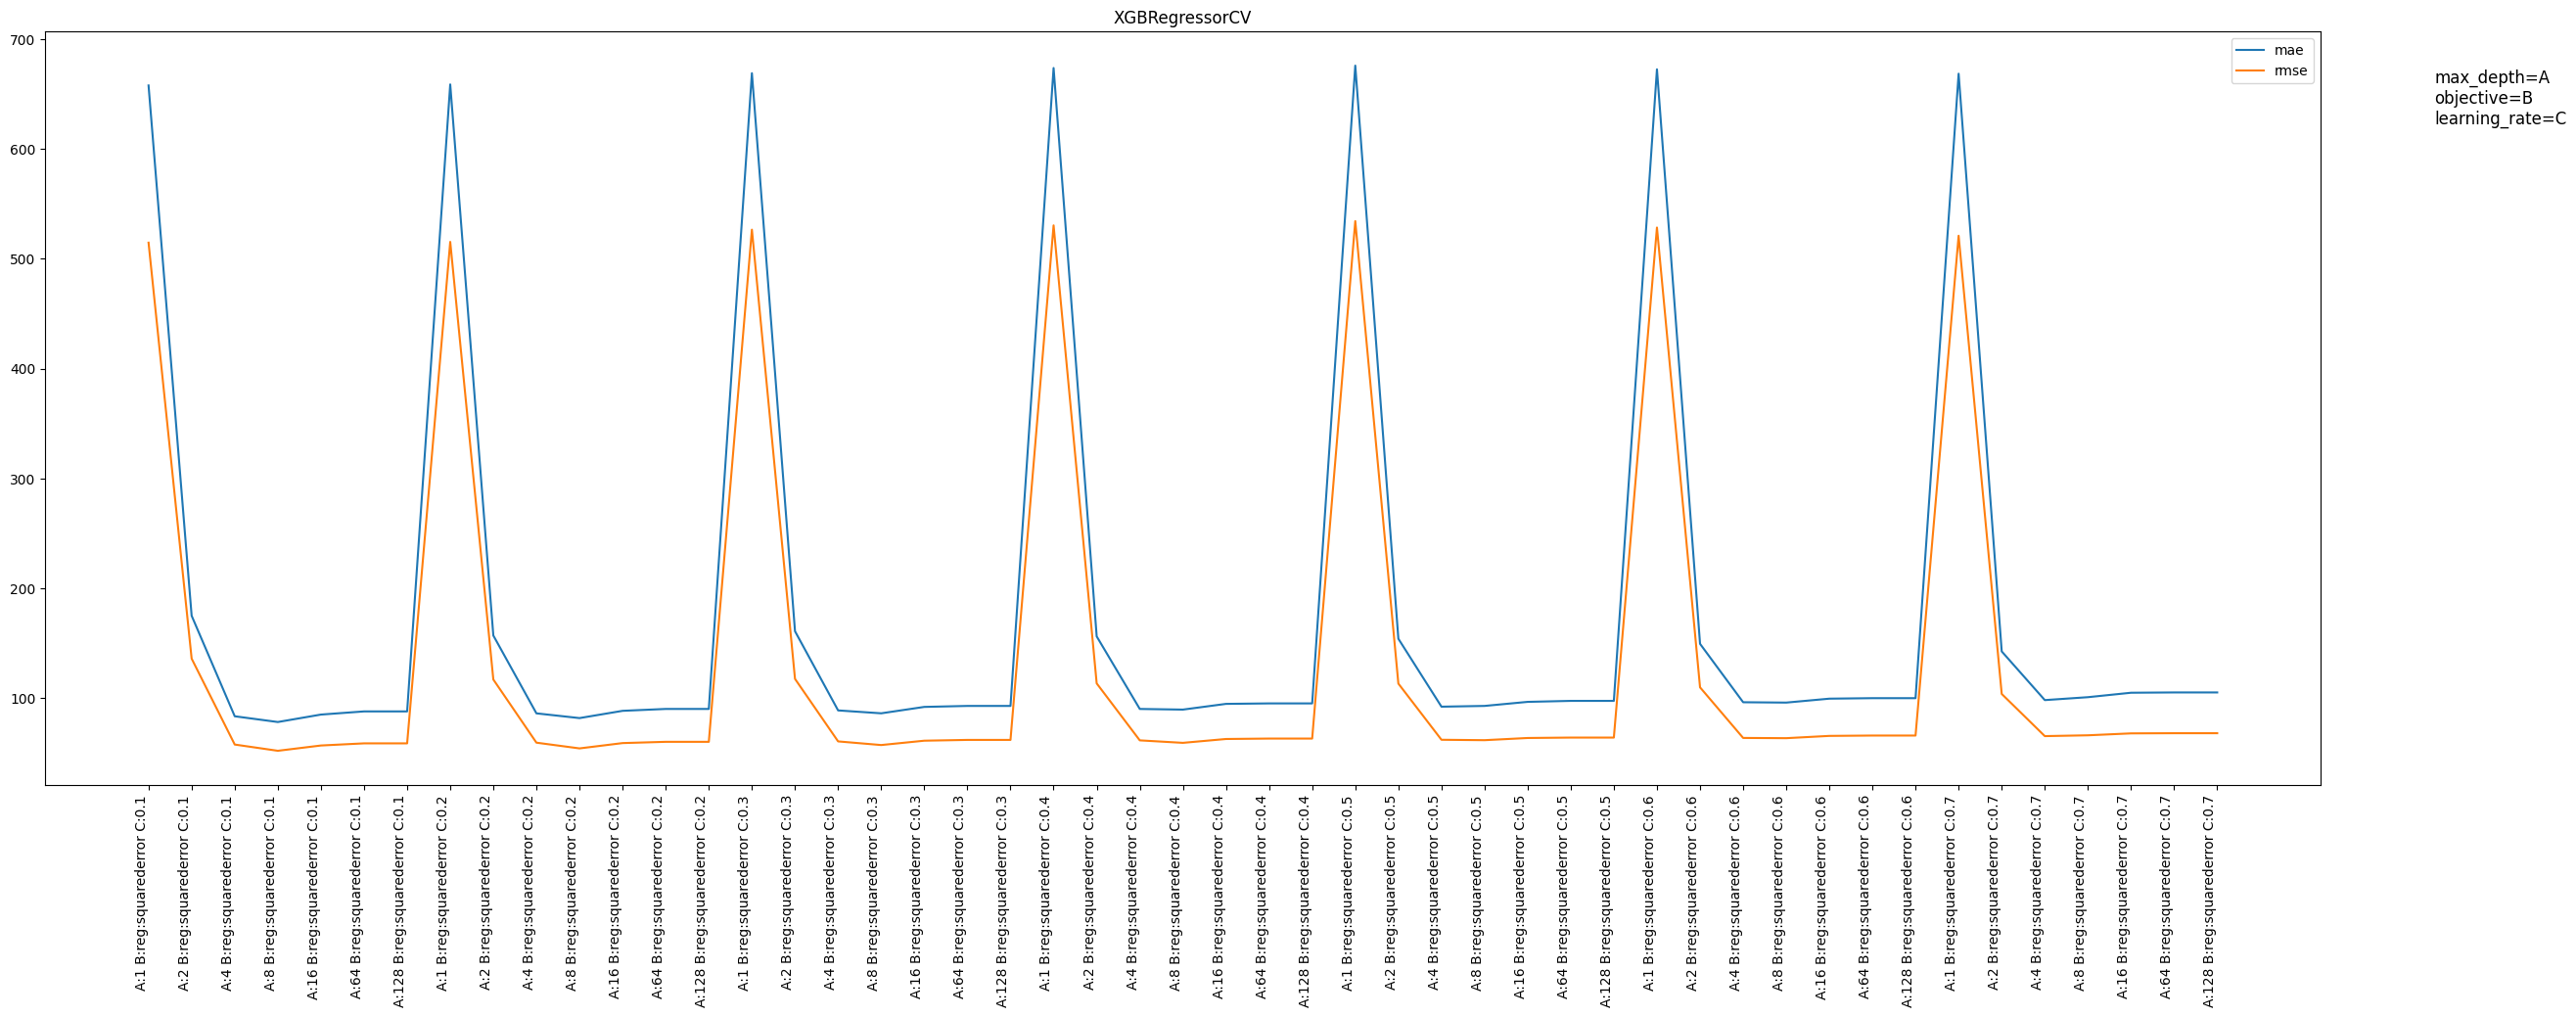

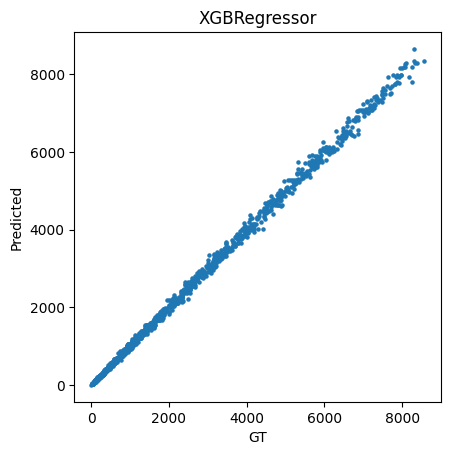

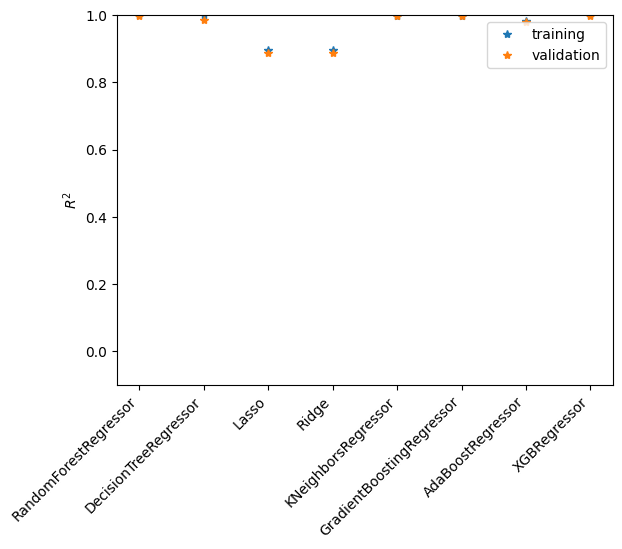

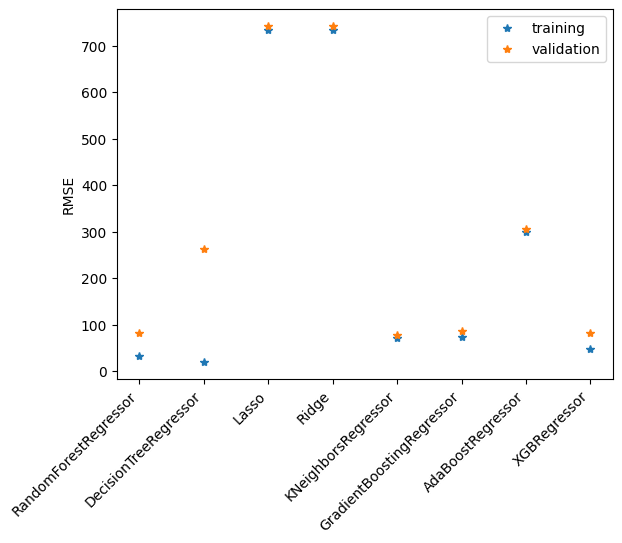

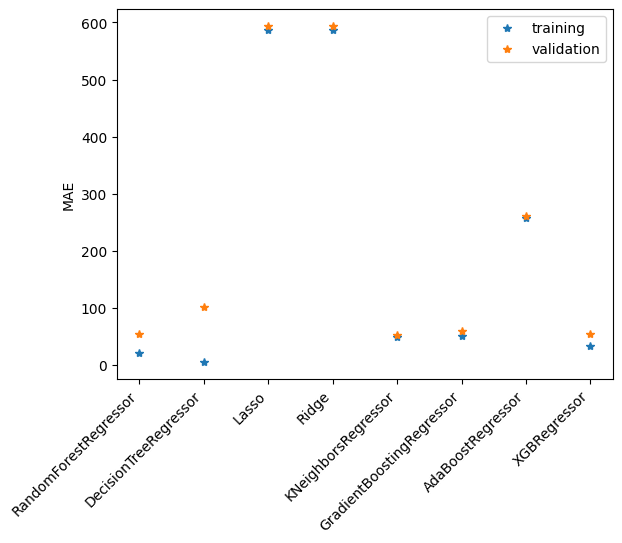

In [39]:
x =  df [['MonthlyCharges', 'tenure' ]]
y = df ['TotalCharges']
res = best_model(x,y,'regression', 'Yes', df [['MonthlyCharges','TotalCharges', 'tenure' ]], hue= None, models = None)

**Let use iur function for classification**

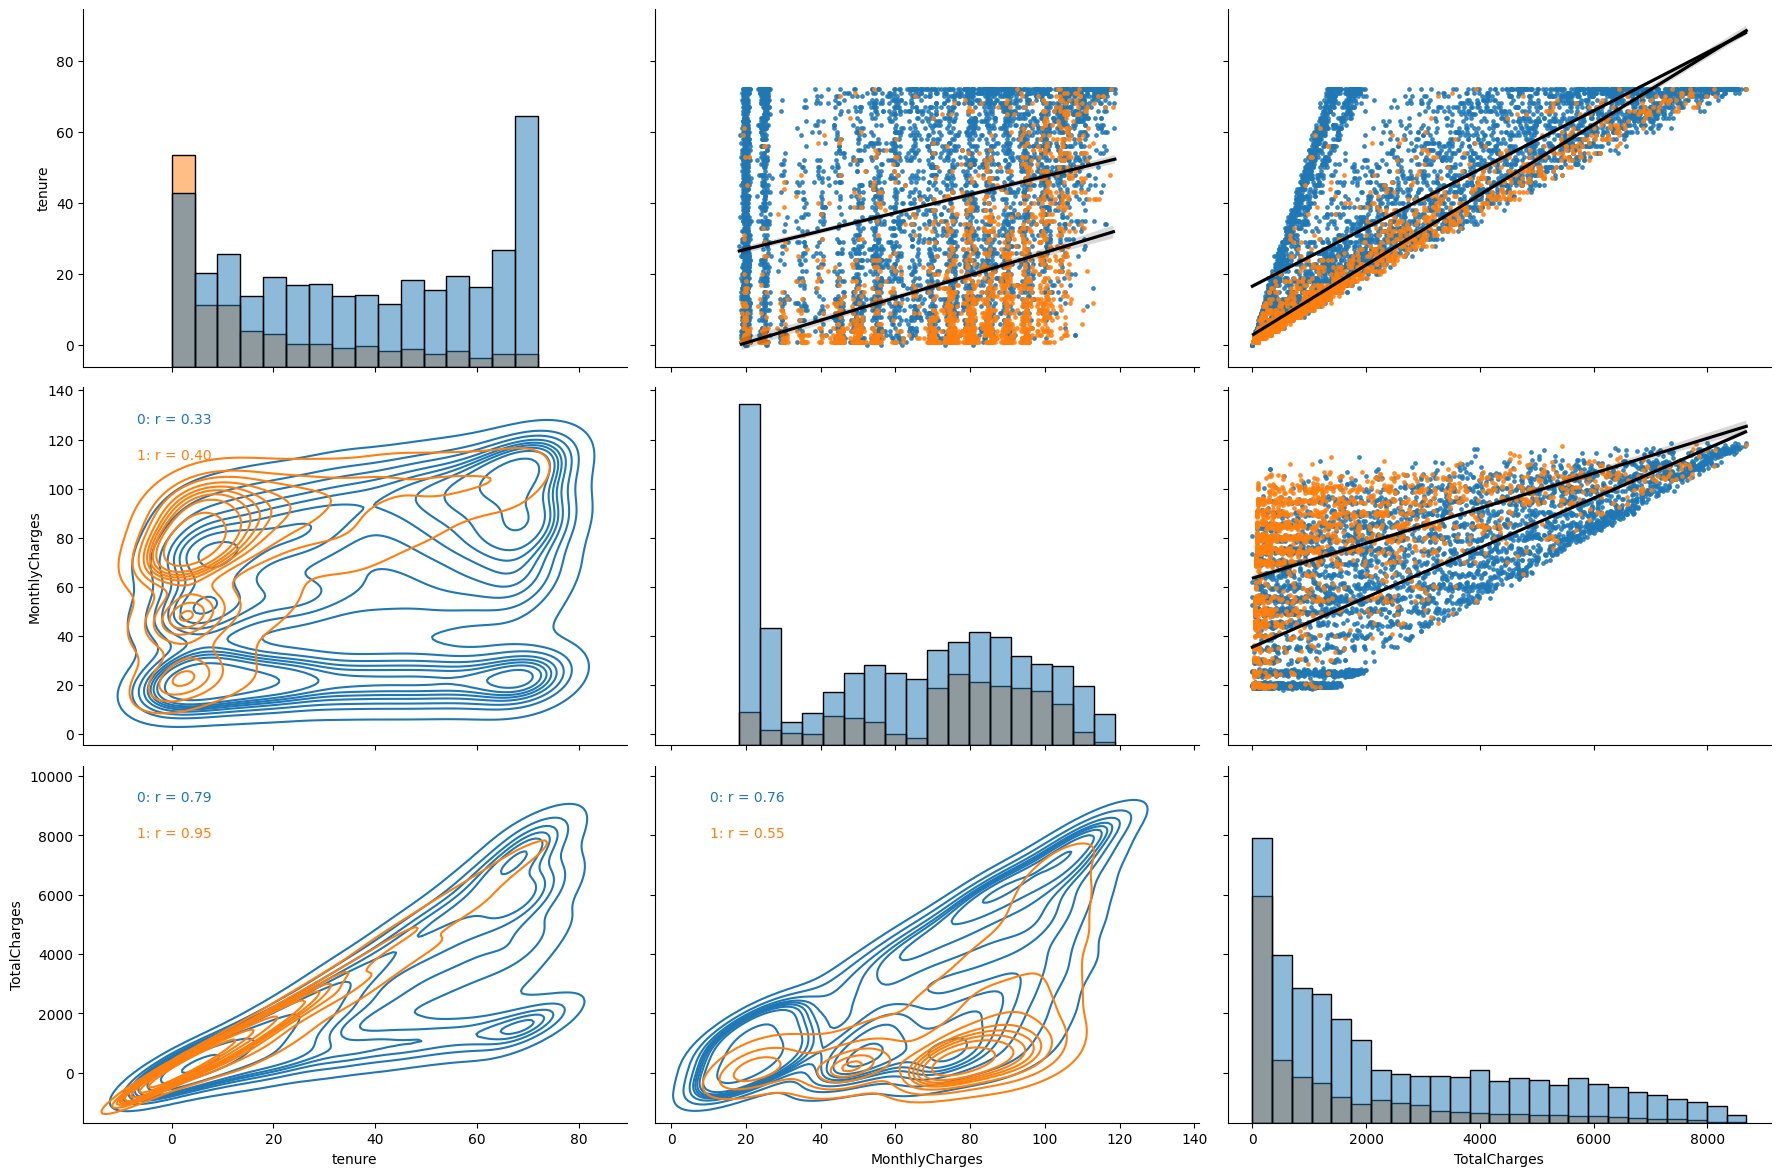

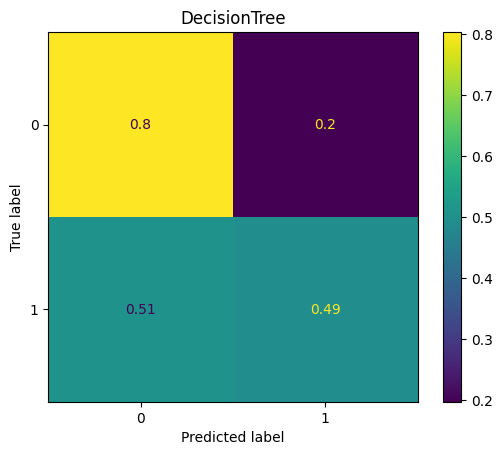

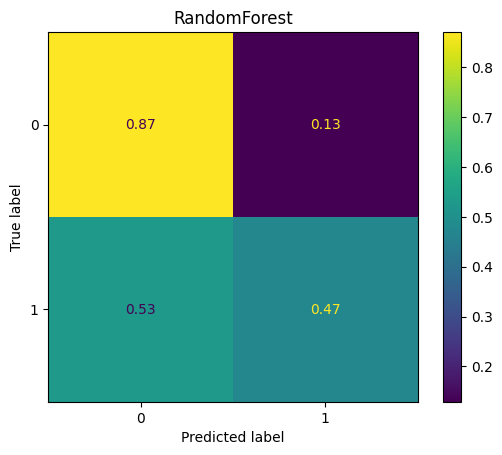

predict_proba is not available when  probability=False


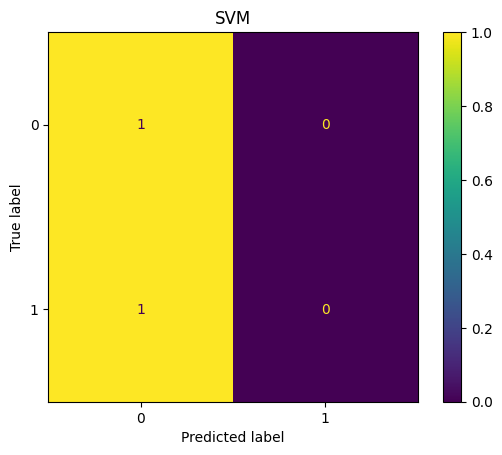

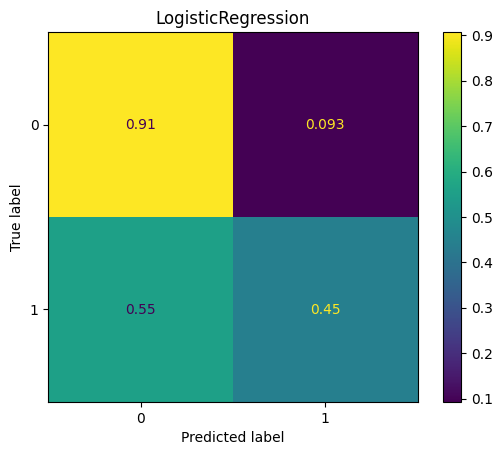

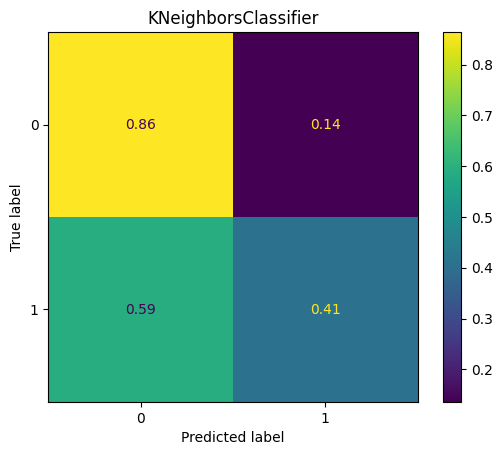

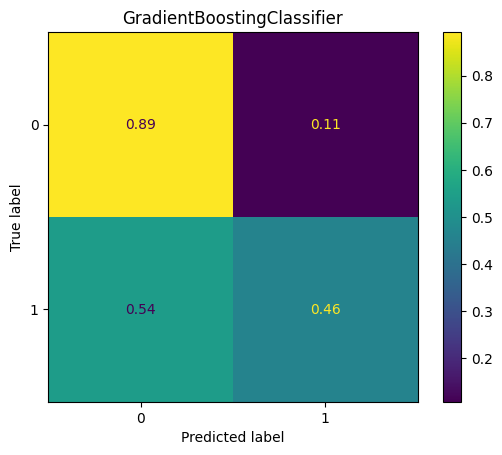

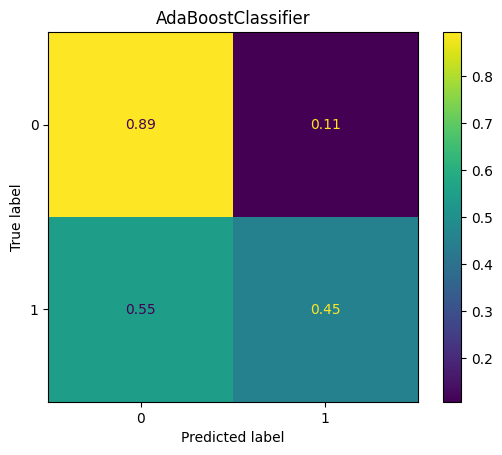

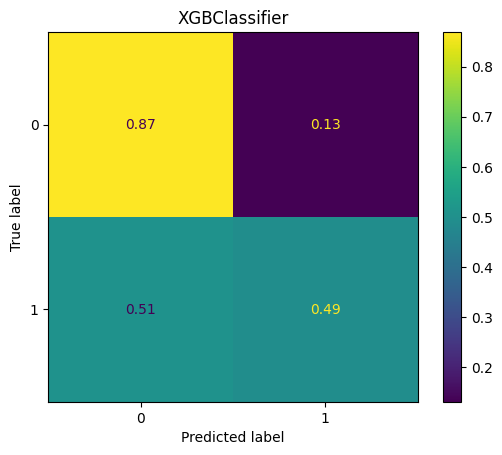

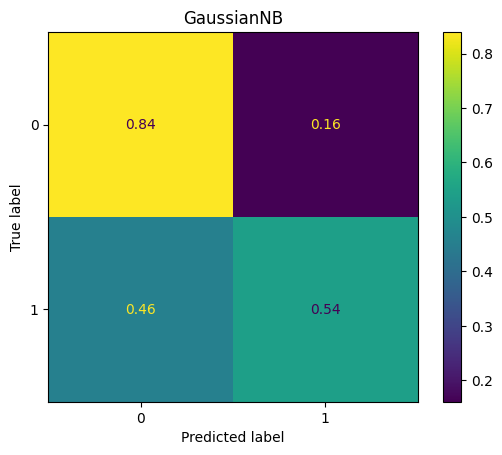

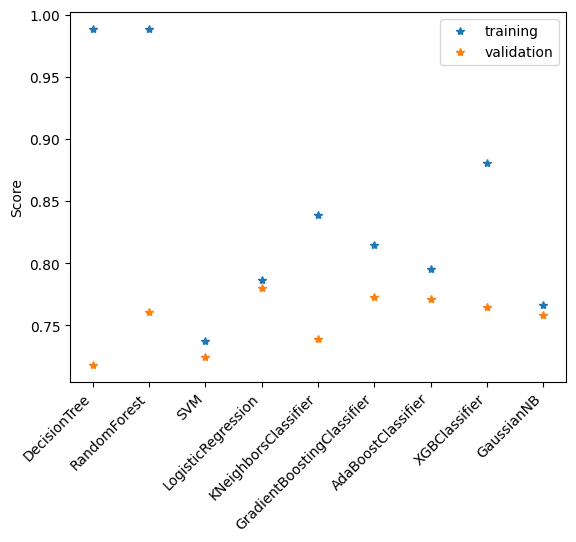

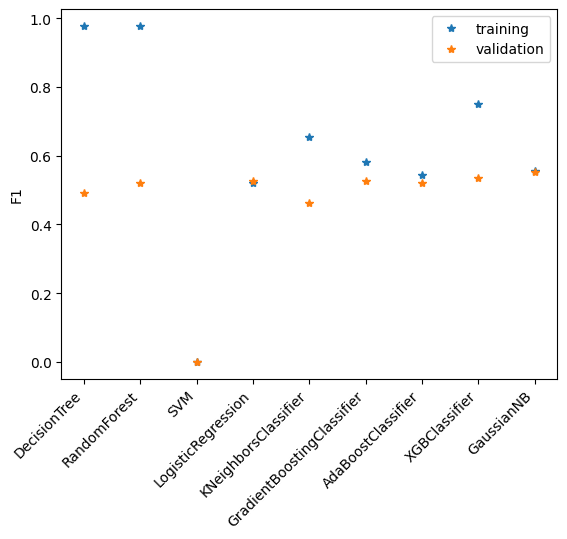

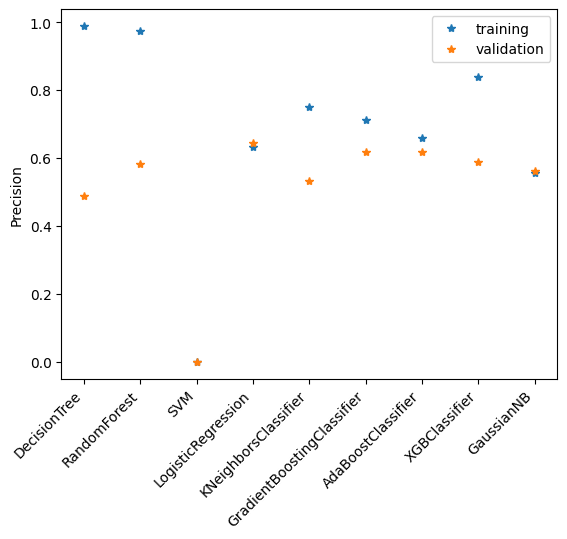

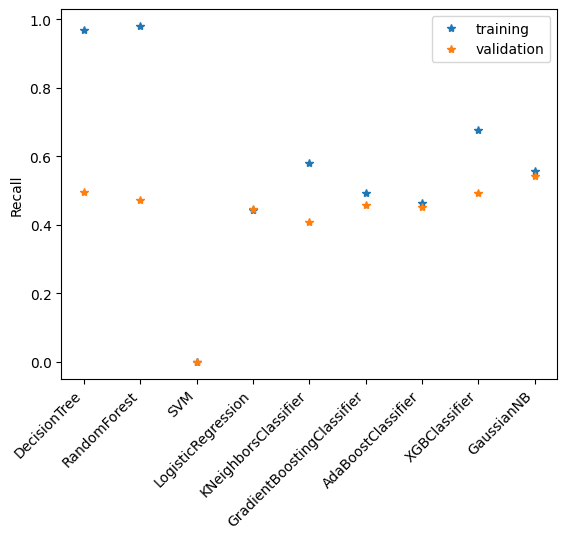

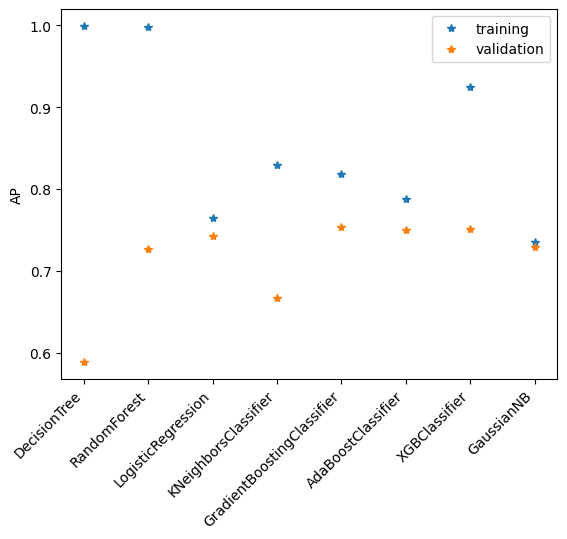

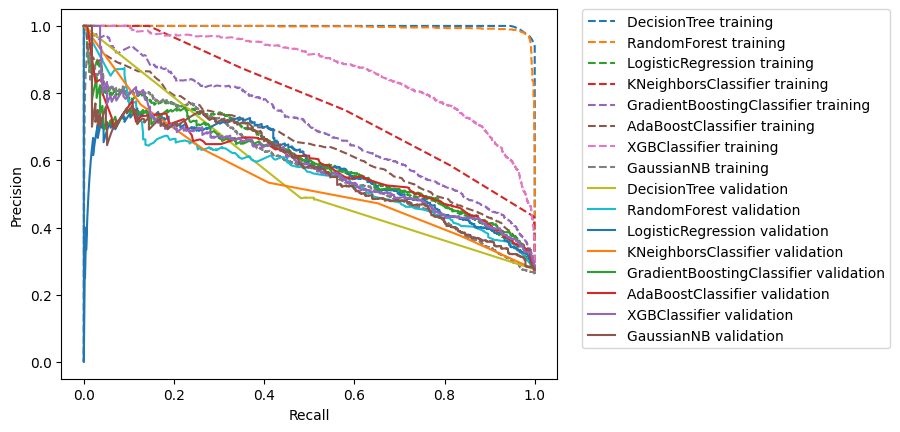

In [40]:
x = df [['MonthlyCharges', 'TotalCharges','tenure' ]].values
y = df['Churn1'].values
res = best_model(x, y, 'classification' , 'No', df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn1']], hue ='Churn1', models= None)